# **Porter: Neural Networks Regression**

### **About Porter**

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers.


### **Problem Statement**

Porter works with a wide range of restaurants for delivering their items directly to the people.Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features


#### **Data Dictionary**

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

* **market_id :** integer id for the market where the restaurant lies
* **created_at :** the timestamp at which the order was placed
* **actual_delivery_time :** the timestamp when the order was delivered
* **store_primary_category :** category for the restaurant
* **order_protocol :** integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
* **total_items subtotal :** final price of the order
* **num_distinct_items :** the number of distinct items in the order
* **min_item_price :** price of the cheapest item in the order
* **max_item_price :** price of the costliest item in order
* **total_onshift_partners :** number of delivery partners on duty at the time order was placed
* **total_busy_partners :** number of delivery partners attending to other tasks
* **total_outstanding_orders :** total number of orders to be fulfilled at the moment.


In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)


In [ ]:
data = pd.read_csv("dataset.csv")
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
data.shape

(197428, 14)

 Our data has 14 features and 197428 rows of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
created_at,197428,180985,2015-02-11 19:50:43,6
actual_delivery_time,197421,178110,2015-02-11 20:40:45,5
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937
store_primary_category,192668,74,american,19399


In [ ]:
data.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

**Missing Value Treatment**

In [ ]:
# Check for the missing values in dataset
null_total = data.isna().sum().sort_values(ascending = False)
null_percent =((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
null = pd.concat([null_total,null_percent.round(4)],axis=1,keys=['Missing Total','Missing Percent'])
null

,Missing Total,Missing Percent
total_onshift_partners,16262,8.2369
total_busy_partners,16262,8.2369
total_outstanding_orders,16262,8.2369
store_primary_category,4760,2.4110
order_protocol,995,0.5040
market_id,987,0.4999
actual_delivery_time,7,0.0035
created_at,0,0.0000
store_id,0,0.0000
total_items,0,0.0000


Our dataset has more than 1% of records as missing values in features like total_outstanding_orders, total_onshift_partners, total_busy_partners and store_primary_category

In [ ]:
missing_percentages = data.isnull().mean() * 100
sub_set=missing_percentages.reset_index()[missing_percentages.reset_index()[0]<1.0]['index'].tolist()
data.dropna(subset=sub_set, inplace=True) # drop missing values in the columns created at and actual delivery time

In [ ]:
data['store_primary_category'] = np.where(data['store_primary_category'].isna(), data['store_primary_category'].mode()[0], data['store_primary_category'])
data['total_onshift_partners'] = np.where(data['total_onshift_partners'].isna(), data['total_onshift_partners'].mode()[0], data['total_onshift_partners'])
data['total_busy_partners'] = np.where(data['total_busy_partners'].isna(), data['total_busy_partners'].mode()[0], data['total_busy_partners'])
data['total_outstanding_orders'] = np.where(data['total_outstanding_orders'].isna(), data['total_outstanding_orders'].mode()[0], data['total_outstanding_orders'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195926 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 195926 non-null  float64
 1   created_at                195926 non-null  object 
 2   actual_delivery_time      195926 non-null  object 
 3   store_id                  195926 non-null  object 
 4   store_primary_category    195926 non-null  object 
 5   order_protocol            195926 non-null  float64
 6   total_items               195926 non-null  int64  
 7   subtotal                  195926 non-null  int64  
 8   num_distinct_items        195926 non-null  int64  
 9   min_item_price            195926 non-null  int64  
 10  max_item_price            195926 non-null  int64  
 11  total_onshift_partners    195926 non-null  float64
 12  total_busy_partners       195926 non-null  float64
 13  total_outstanding_orders  195926 non-null  f

**Feature Engineering**

We have the time at which the order was placed and time at which it was delivered, so we will create a new column for time taken in delivery and that will be our target column

Calculating time taken in delivery by subtracting the order timestamp from delivery timestamp

In [ ]:
data.created_at = pd.to_datetime(data.created_at)
data.actual_delivery_time = pd.to_datetime(data.actual_delivery_time)

**Target Variable is Delivery Time**

In [ ]:
# Target variable
data['delivery_time'] = ((data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 60).round(3)
data['delivery_time'].describe().round(3)

count    195926.000
mean         48.480
std         321.710
min           1.683
25%          35.067
50%          44.333
75%          56.367
max      141947.650
Name: delivery_time, dtype: float64

In [ ]:
# New feature creation
data['order_year'] = data['created_at'].dt.year
data['order_month'] = data['created_at'].dt.month
data['order_hour']=data['created_at'].dt.hour
data['order_day'] = data['created_at'].dt.day_name()

In [ ]:
data.order_day.value_counts()

Saturday     34292
Sunday       33370
Friday       27672
Monday       27189
Thursday     25480
Wednesday    24084
Tuesday      23839
Name: order_day, dtype: int64

In [ ]:
data.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)

In [ ]:
data['market_id'] = data['market_id'].astype('category')
data['store_id'] = data['store_id'].astype('category')
data['store_primary_category'] = data['store_primary_category'].astype('category')
data['order_protocol'] = data['order_protocol'].astype('category')
data['order_year'] = data['order_year'].astype('category')
data['order_month'] = data['order_month'].astype('category')
data['order_day'] = data['order_day'].astype('category')

In [ ]:
data['total_onshift_partners']=data['total_onshift_partners'].astype('int64')
data['total_busy_partners'] = data['total_busy_partners'].astype('int64')
data['total_outstanding_orders'] = data['total_outstanding_orders'].astype('int64')

In [ ]:
df_cat = data.select_dtypes(include = 'category')
df_num = data.select_dtypes(exclude = 'category')

In [ ]:
df_cat.head()

,market_id,store_id,store_primary_category,order_protocol,order_year,order_month,order_day
0,1.0,df263d996281d984952c07998dc54358,american,1.0,2015,2,Friday
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,2015,2,Tuesday
2,3.0,f0ade77b43923b38237db569b016ba25,american,1.0,2015,1,Thursday
3,3.0,f0ade77b43923b38237db569b016ba25,american,1.0,2015,2,Tuesday
4,3.0,f0ade77b43923b38237db569b016ba25,american,1.0,2015,2,Sunday


In [ ]:
df_cat.drop('store_id' , axis=1 , inplace=True)

**Encoding the Categorical Features**

In [ ]:
# Encoding the categorical features using Label Encoder
encoder = LabelEncoder()
for feature in df_cat.columns:
  df_cat[feature] = encoder.fit_transform(df_cat[feature])

In [ ]:
df_num.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_hour
0,4,3441,4,557,1239,33,14,21,62.983,22
1,1,1900,1,1400,1400,1,2,2,67.067,21
2,1,1900,1,1900,1900,1,0,0,29.683,20
3,6,6900,5,600,1800,1,1,2,51.250,21
4,3,3900,3,1100,1600,6,6,9,39.833,2


In [ ]:
df = pd.concat((df_num , df_cat) , axis = 1)
df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,order_hour,market_id,store_primary_category,order_protocol,order_year,order_month,order_day
0,4,3441,4,557,1239,33,14,21,62.983,22,0,4,0,1,1,0
1,1,1900,1,1400,1400,1,2,2,67.067,21,1,47,1,1,1,5
2,1,1900,1,1900,1900,1,0,0,29.683,20,2,4,0,1,0,4
3,6,6900,5,600,1800,1,1,2,51.250,21,2,4,0,1,1,5
4,3,3900,3,1100,1600,6,6,9,39.833,2,2,4,0,1,1,3


In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
total_items,195926.0,3.20,2.67,1.00,2.00,3.00,4.00,411.00
subtotal,195926.0,2682.23,1823.34,0.00,1400.00,2200.00,3395.00,27100.00
num_distinct_items,195926.0,2.67,1.63,1.00,1.00,2.00,3.00,20.00
min_item_price,195926.0,686.26,522.22,-86.00,299.00,595.00,949.00,14700.00
max_item_price,195926.0,1159.58,558.57,0.00,800.00,1095.00,1395.00,14700.00
total_onshift_partners,195926.0,41.11,35.29,-4.00,13.00,32.00,62.00,171.00
total_busy_partners,195926.0,38.29,32.86,-5.00,11.00,30.00,59.00,154.00
total_outstanding_orders,195926.0,53.25,52.91,-6.00,12.00,35.00,80.00,285.00
delivery_time,195926.0,48.48,321.71,1.68,35.07,44.33,56.37,141947.65
order_hour,195926.0,8.47,8.66,0.00,2.00,3.00,19.00,23.00


-----------------------------------------------------------
-------------------------------------------------------------
-----------------------------------------------------------

## **Exploratory Data Analysis**
> **Univariate Analysis**

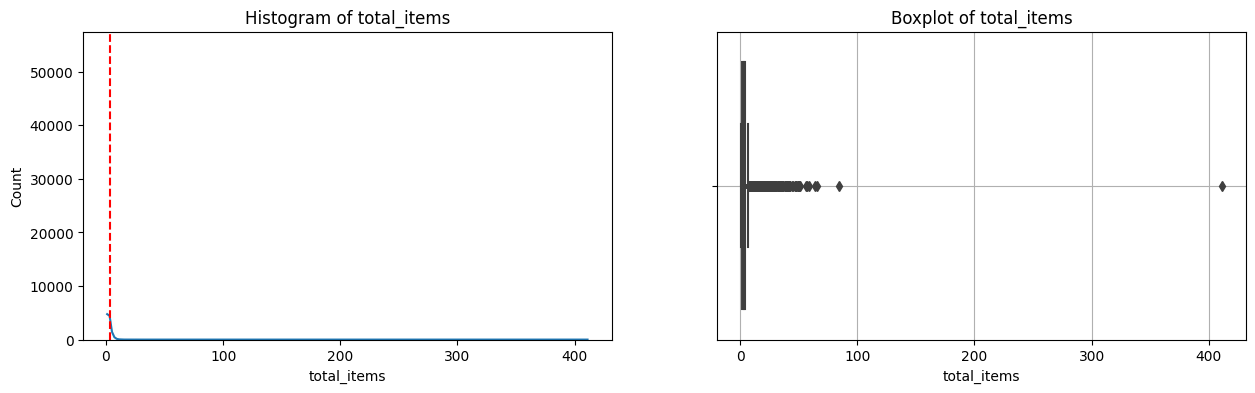

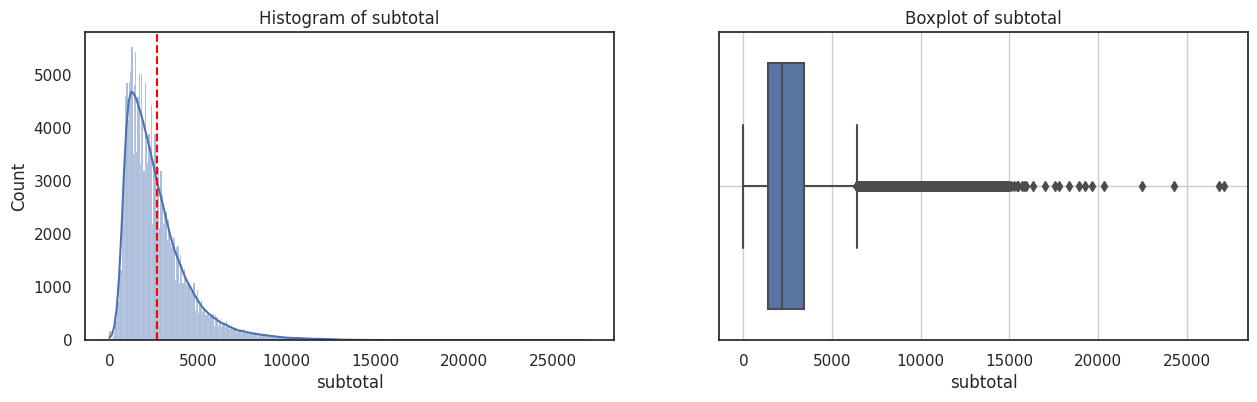

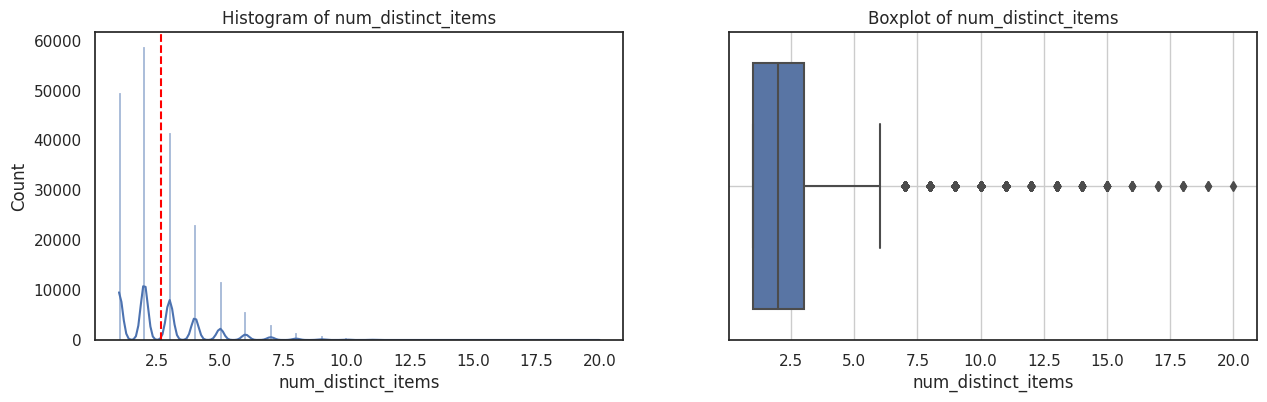

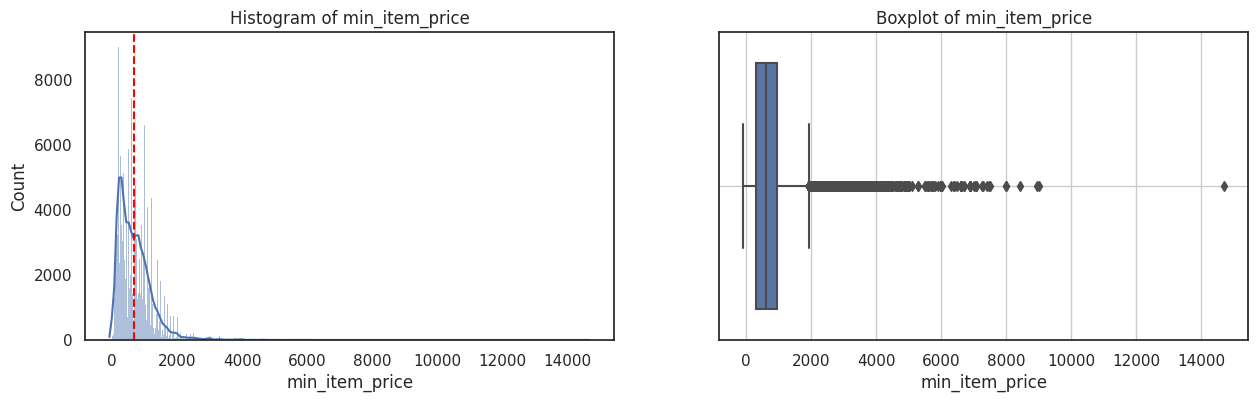

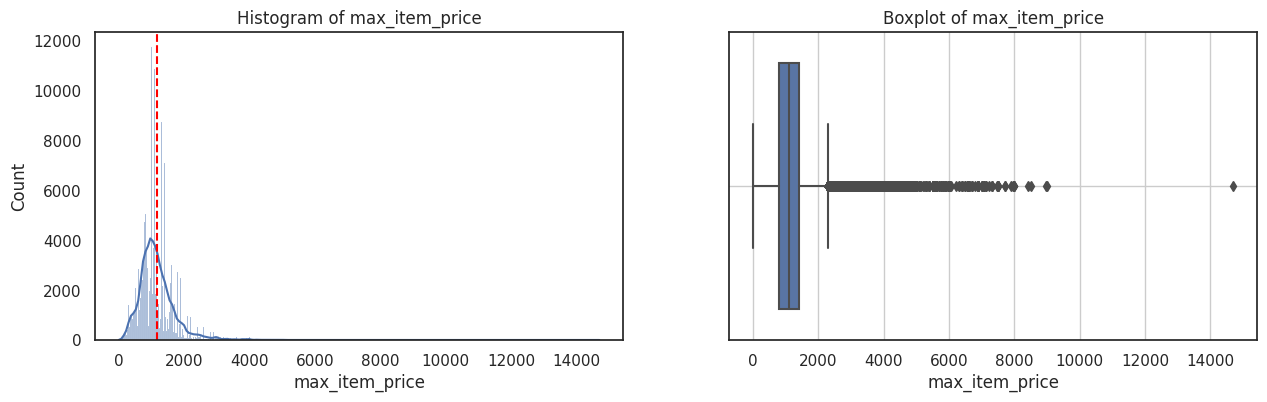

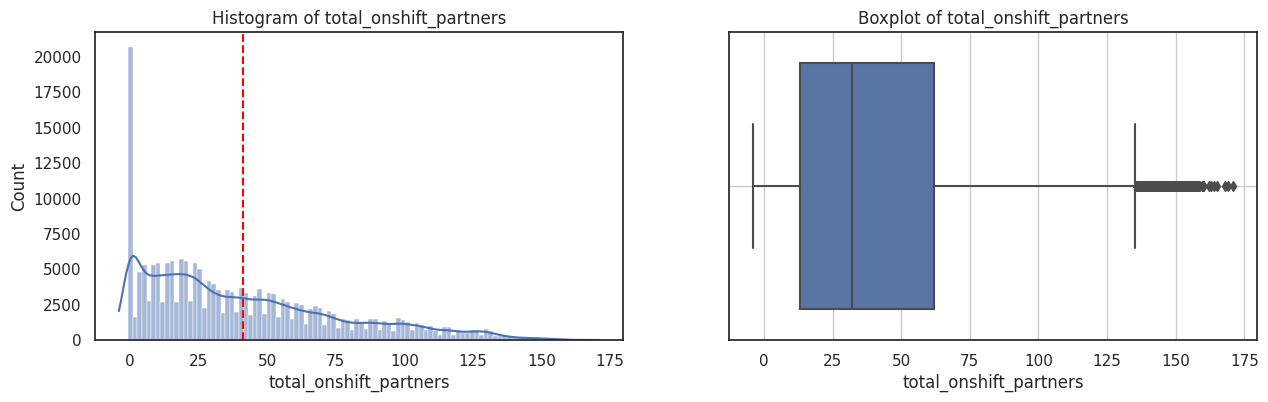

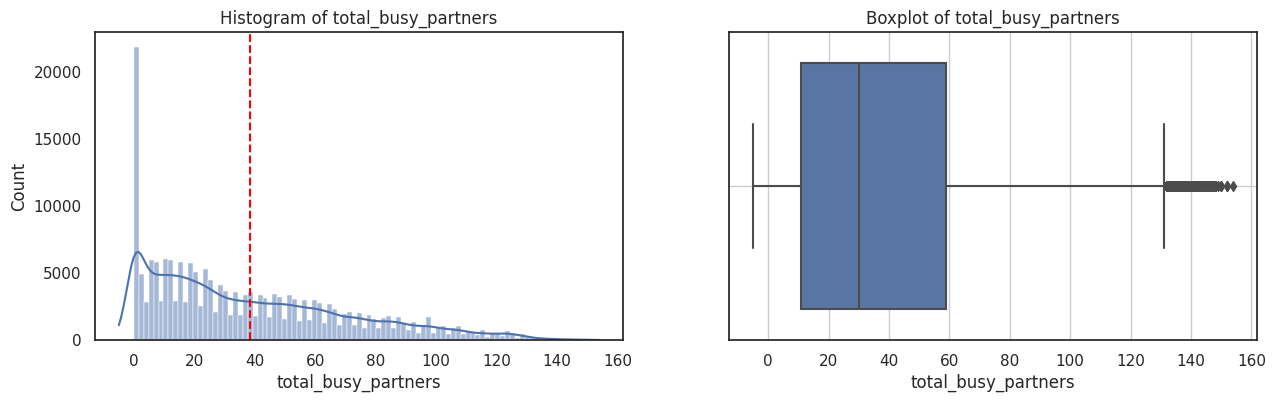

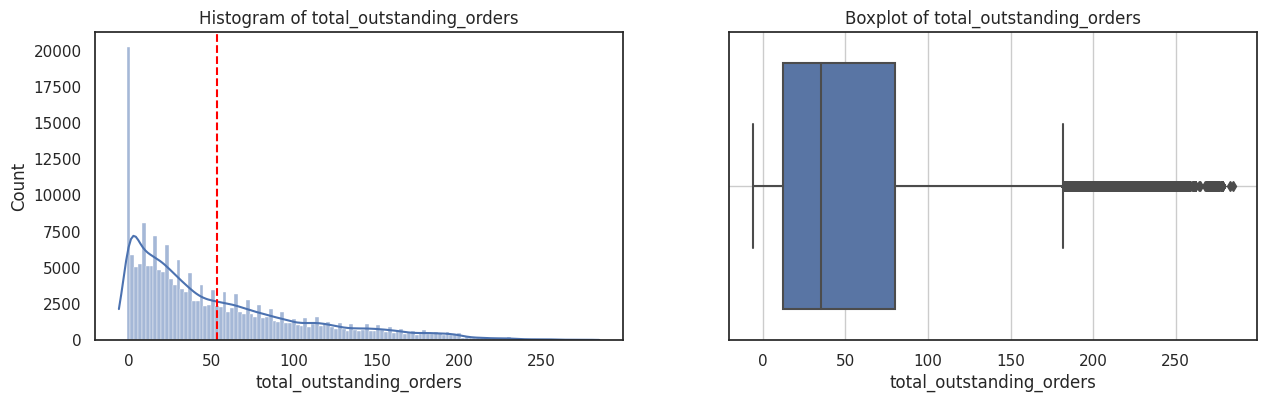

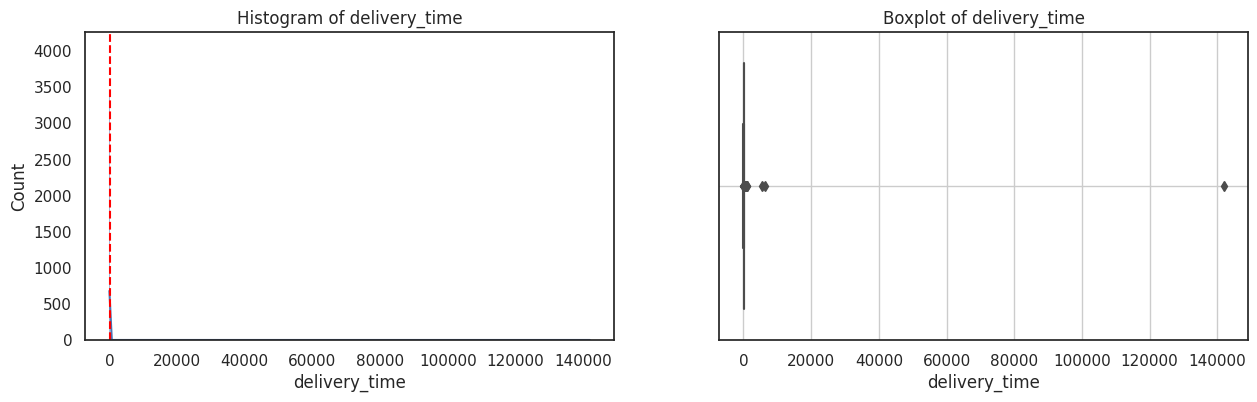

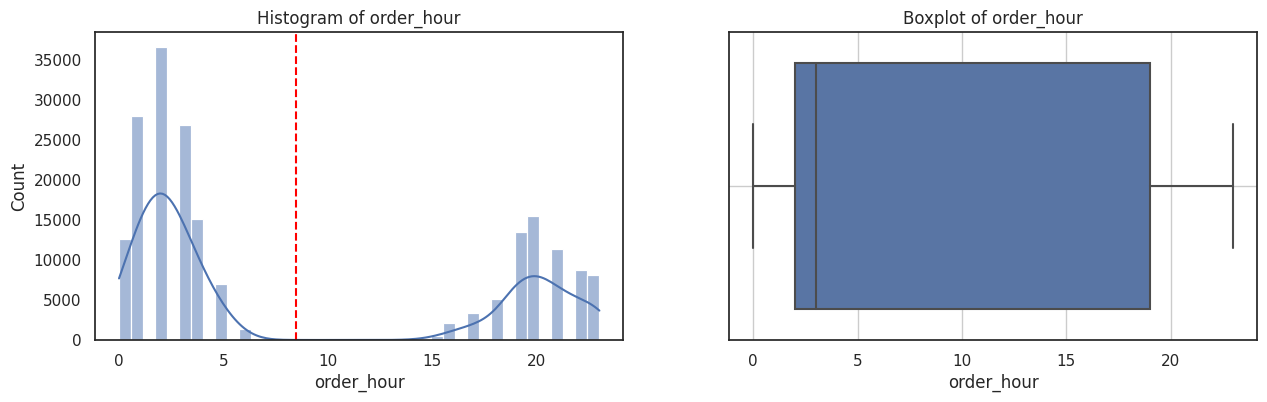

In [ ]:
import scipy.stats as stats
# Univariate analysis for numerical columns
def univariate(x,y):
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(121)
    sns.histplot(x,kde=True,ax=ax)
    ax.axvline(x.mean(),color='red',ls= '--')
    ax2 = fig.add_subplot(122)
    sns.boxplot(x = x,data=df,ax=ax2)
    ax.set_title("Histogram of " + y)
    ax2.set_title("Boxplot of "+ y)
    sns.set(style='white')

    plt.grid()
    plt.show()


for i in df_num.columns:
    univariate(data[i],str(i))

In [ ]:
for col in  df_cat.columns:
    print(data[col].value_counts())
    print("--"*40)

2.0    54907
4.0    47471
1.0    37946
3.0    23242
5.0    17950
6.0    14410
Name: market_id, dtype: int64
--------------------------------------------------------------------------------
american             23323
pizza                17250
mexican              17030
burger               10923
sandwich             10023
chinese               9385
japanese              9158
dessert               8742
fast                  7338
indian                7287
thai                  7194
italian               7155
vietnamese            6070
mediterranean         5491
breakfast             5407
other                 3970
salad                 3735
greek                 3315
seafood               2718
barbecue              2710
asian                 2442
cafe                  2220
sushi                 2179
alcohol               1843
korean                1806
smoothie              1650
catering              1625
middle-eastern        1496
hawaiian              1491
dim-sum               1106
s

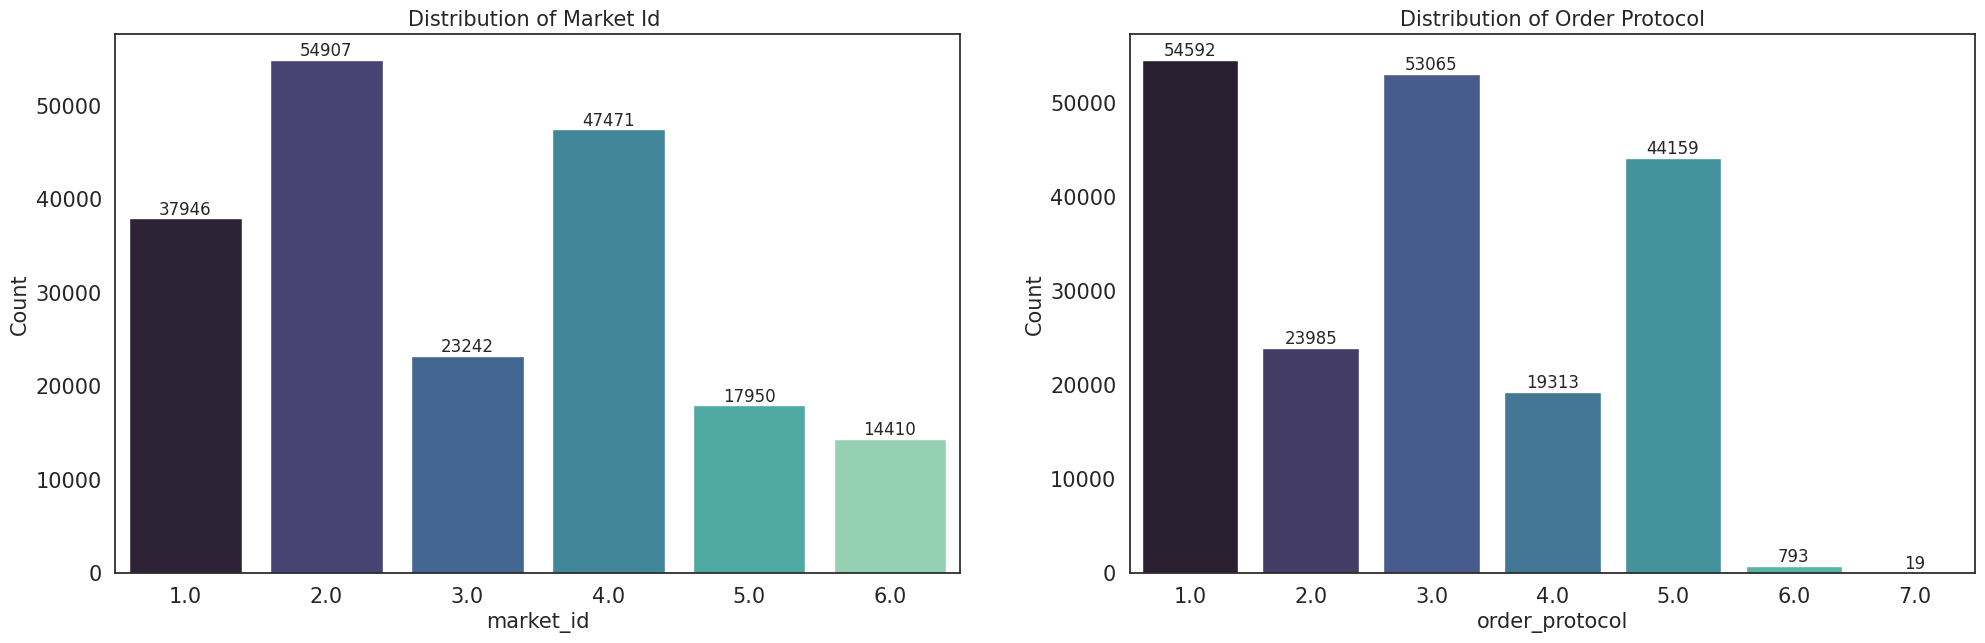

In [ ]:
# Univariate analysis for categorical columns
fig, axs = plt.subplots(1, 2, figsize=(24,7), sharey=False)

graph = sns.countplot(x = 'market_id', data= data, ax = axs[0],palette='mako')
for i in graph.containers:
  graph.bar_label(i,)
graph.set_title("Distribution of Market Id ", fontsize = 15)
graph.set_xlabel('market_id', fontsize=15);
graph.set_ylabel('Count', fontsize=15);
graph.tick_params(axis='both', which='major', labelsize=15)

graph = sns.countplot(x = 'order_protocol', data= data, ax = axs[1],palette='mako')
for i in graph.containers:
  graph.bar_label(i,)
graph.set_title("Distribution of Order Protocol", fontsize = 15)
graph.set_xlabel('order_protocol', fontsize=15);
graph.set_ylabel('Count', fontsize=15);
graph.tick_params(axis='both', which='major', labelsize=15)

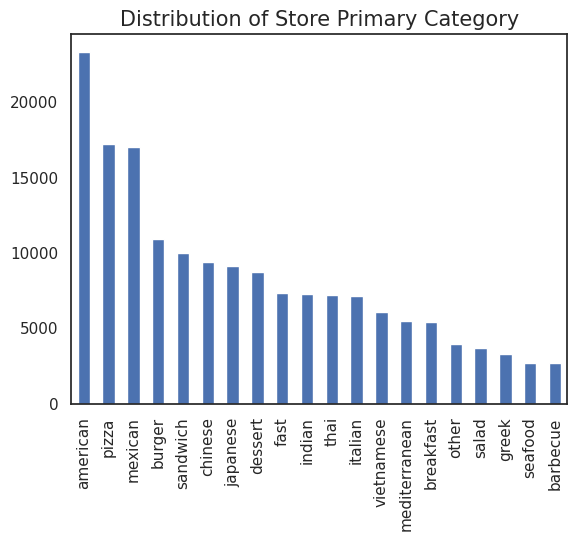

In [ ]:
data['store_primary_category'].value_counts().sort_values(ascending=False)[:20].plot(kind = 'bar')
plt.title("Distribution of Store Primary Category", fontsize = 15)
plt.show()

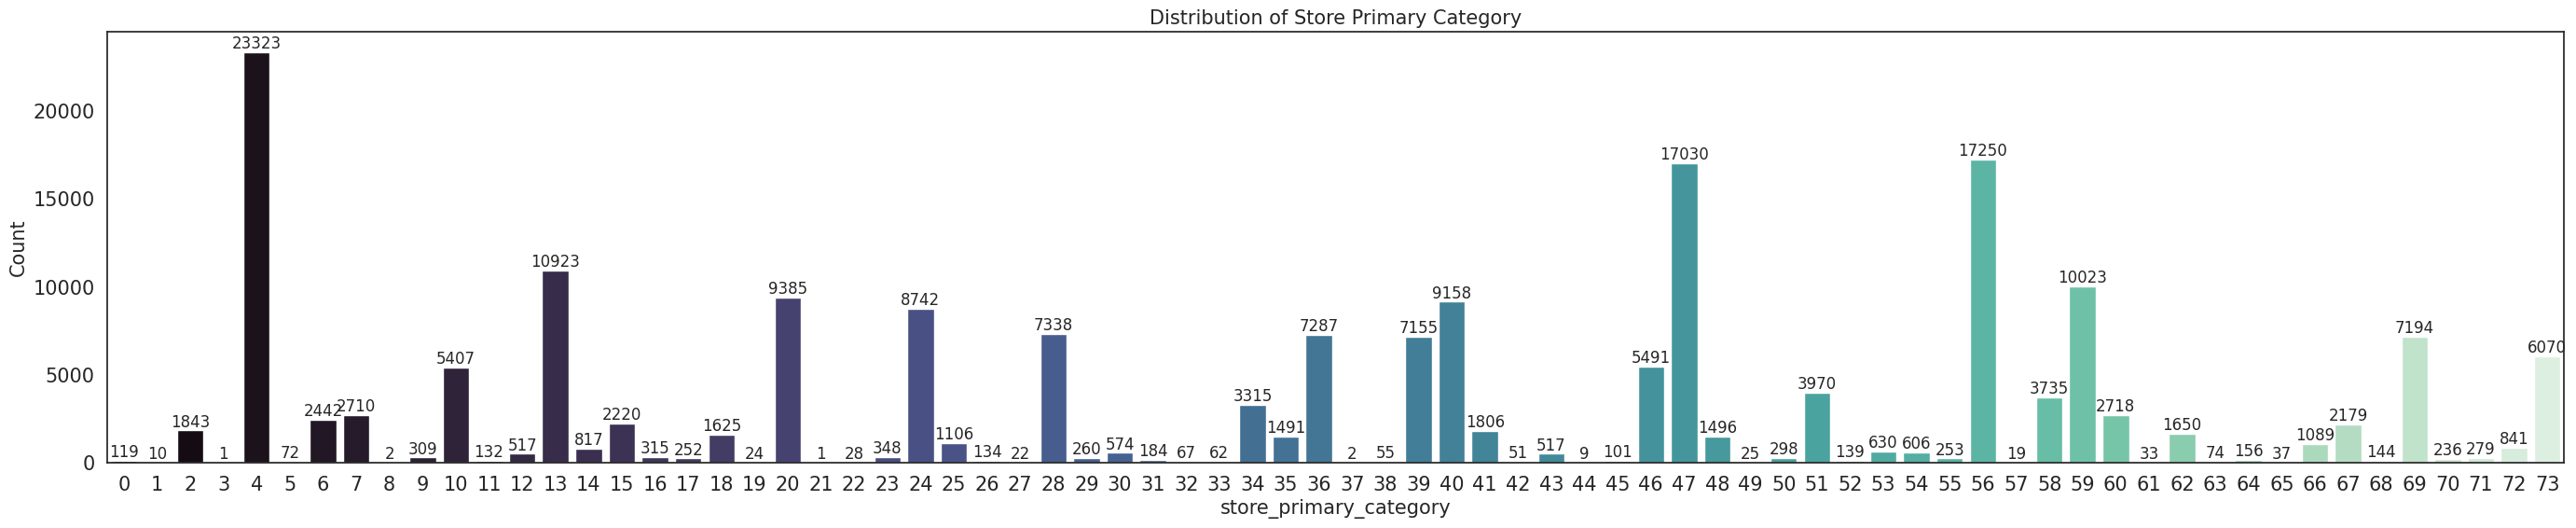

In [ ]:
plt.figure(figsize=(34,6))
graph = sns.countplot(x = 'store_primary_category', data= df,palette='mako')
for i in graph.containers:
  graph.bar_label(i,)
graph.set_title("Distribution of Store Primary Category", fontsize = 15)
graph.set_xlabel('store_primary_category', fontsize=15);
graph.set_ylabel('Count', fontsize=15);

graph.tick_params(axis='both', which='major', labelsize=15)

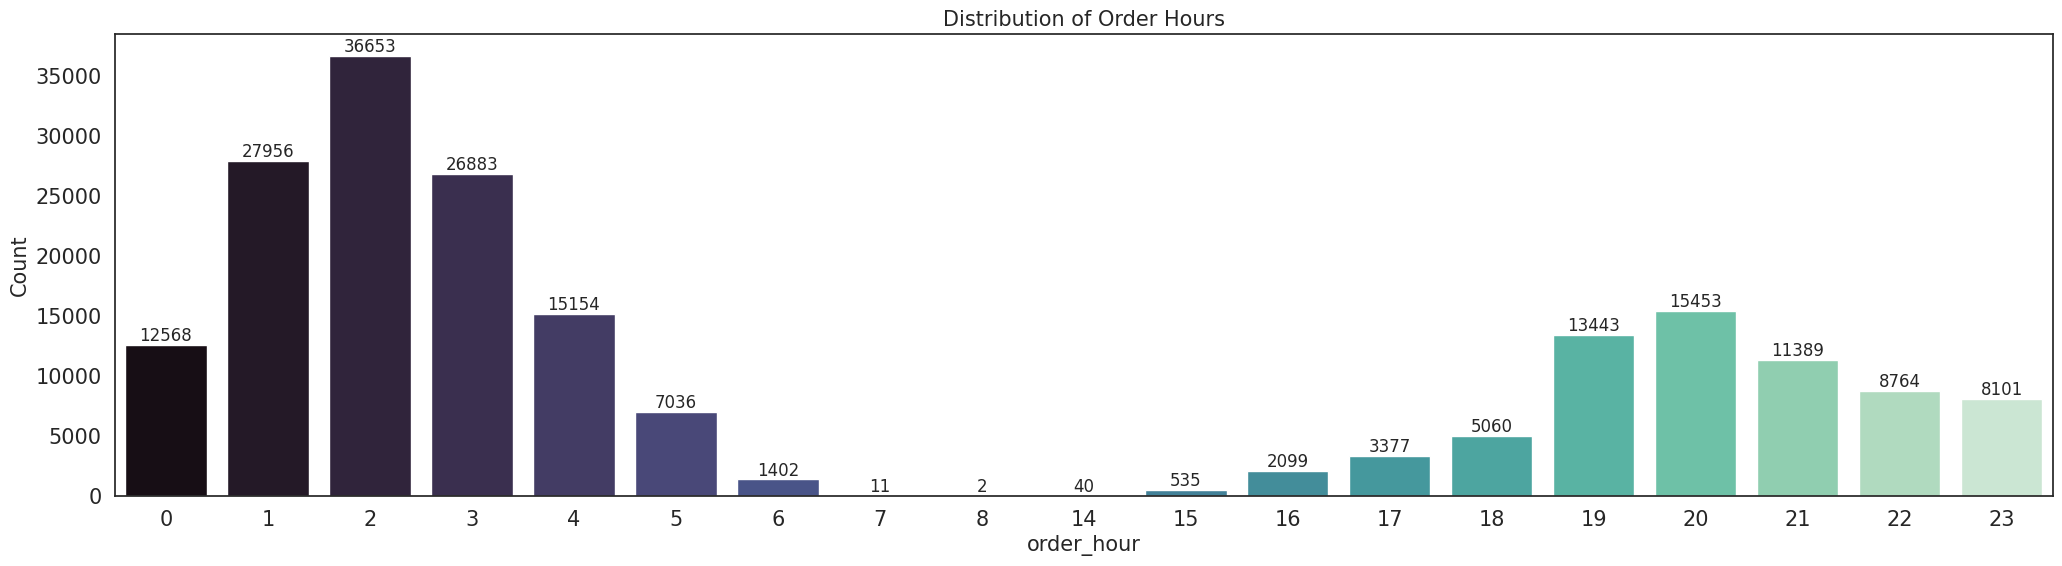

In [ ]:
plt.figure(figsize=(25,6))
graph = sns.countplot(x = 'order_hour', data= data,palette='mako')
for i in graph.containers:
  graph.bar_label(i,)
graph.set_title("Distribution of Order Hours", fontsize = 15)
graph.set_xlabel('order_hour', fontsize=15);
graph.set_ylabel('Count', fontsize=15);
graph.tick_params(axis='both', which='major', labelsize=15)

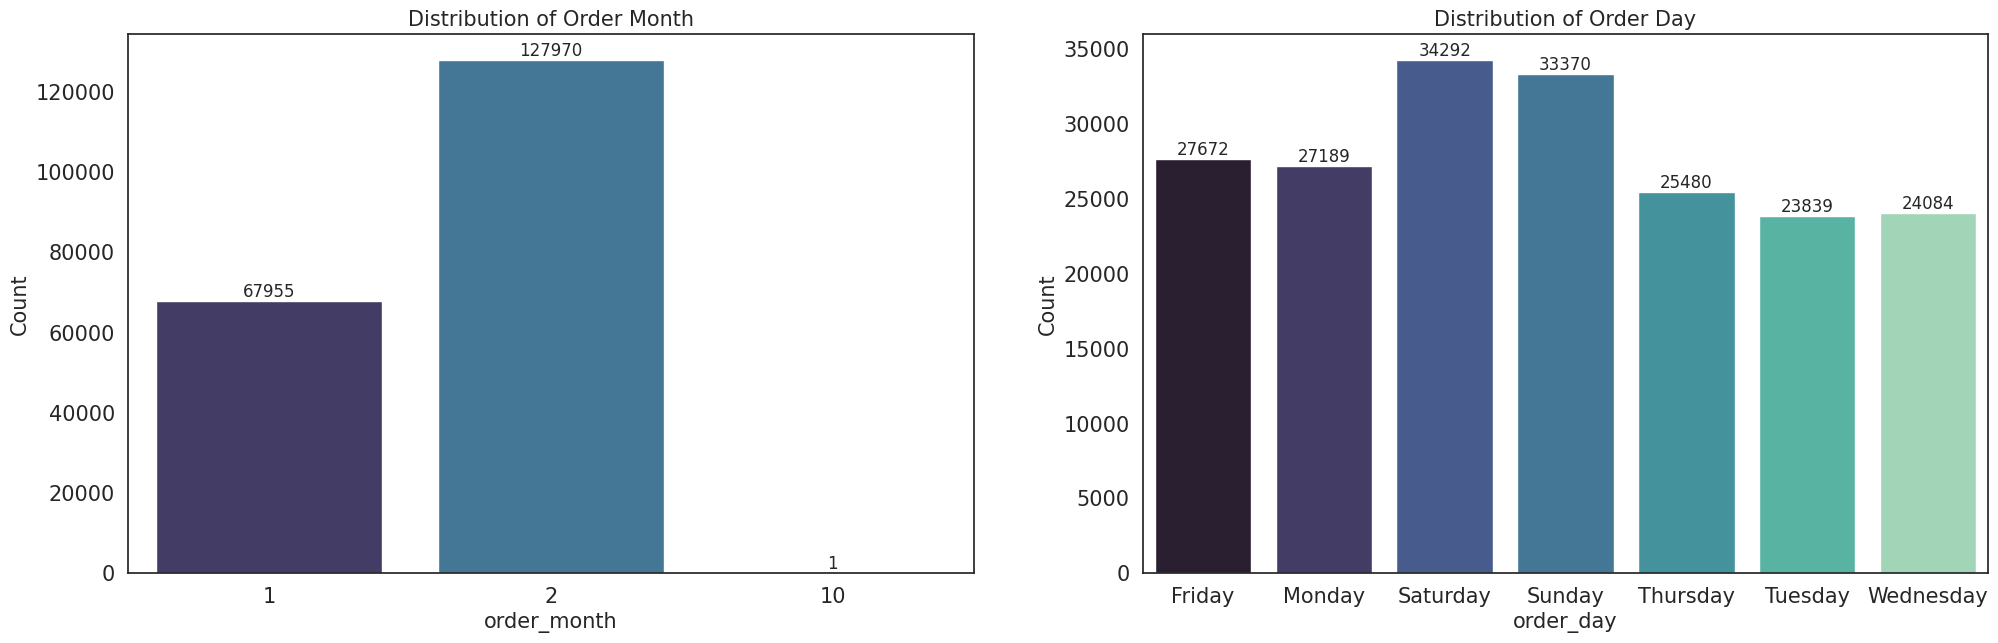

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(24,7), sharey=False)

graph = sns.countplot(x = 'order_month', data= data,ax= axs[0],palette='mako')
for i in graph.containers:
  graph.bar_label(i,)
graph.set_title("Distribution of Order Month", fontsize = 15)
graph.set_xlabel('order_month', fontsize=15);
graph.set_ylabel('Count', fontsize=15);
graph.tick_params(axis='both', which='major', labelsize=15)

graph = sns.countplot(x = 'order_day', data= data,ax= axs[1],palette='mako')
for i in graph.containers:
  graph.bar_label(i,)
graph.set_title("Distribution of Order Day", fontsize = 15)
graph.set_xlabel('order_day', fontsize=15);
graph.set_ylabel('Count', fontsize=15);
graph.tick_params(axis='both', which='major', labelsize=15)

**Observations**
* Weekends have more orders
* The maximum numbers are placed around 2 am midnight and 8 pm in the evening and they almost follow bimodular normal distibutions at 2 am and 8pm.
* The market id 2, 4  and 1 have higher order volumes.
* The distribution of features min_price,max_price,sub total,total onshift parterns are right skewed distributions.

> #### **Bivariate Analysis**

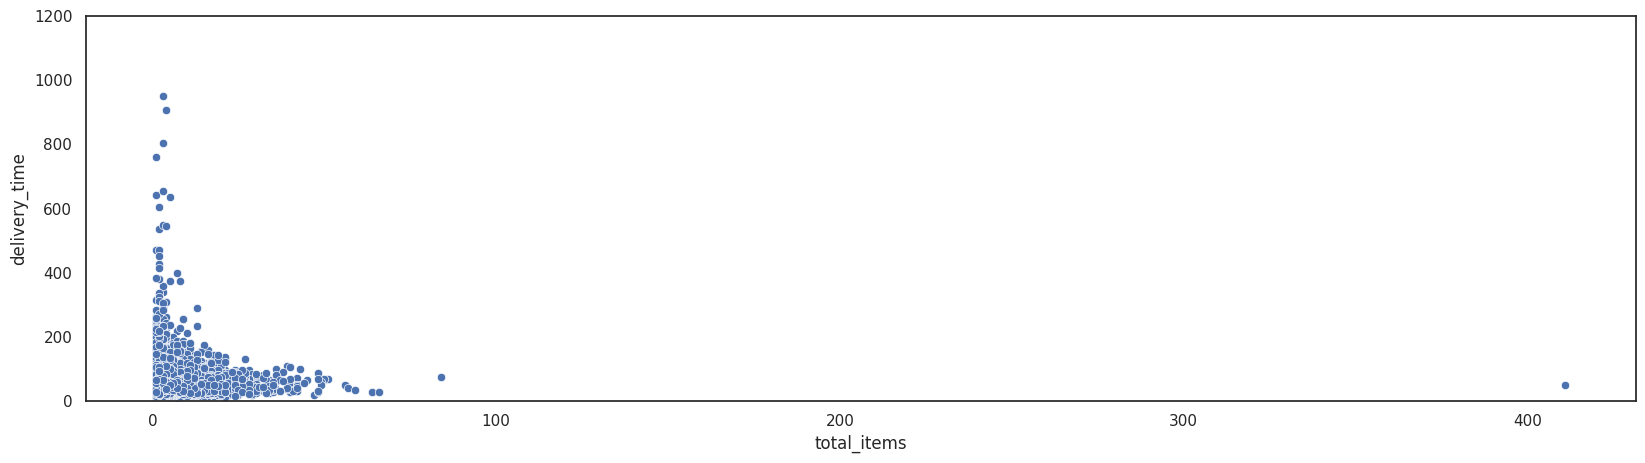

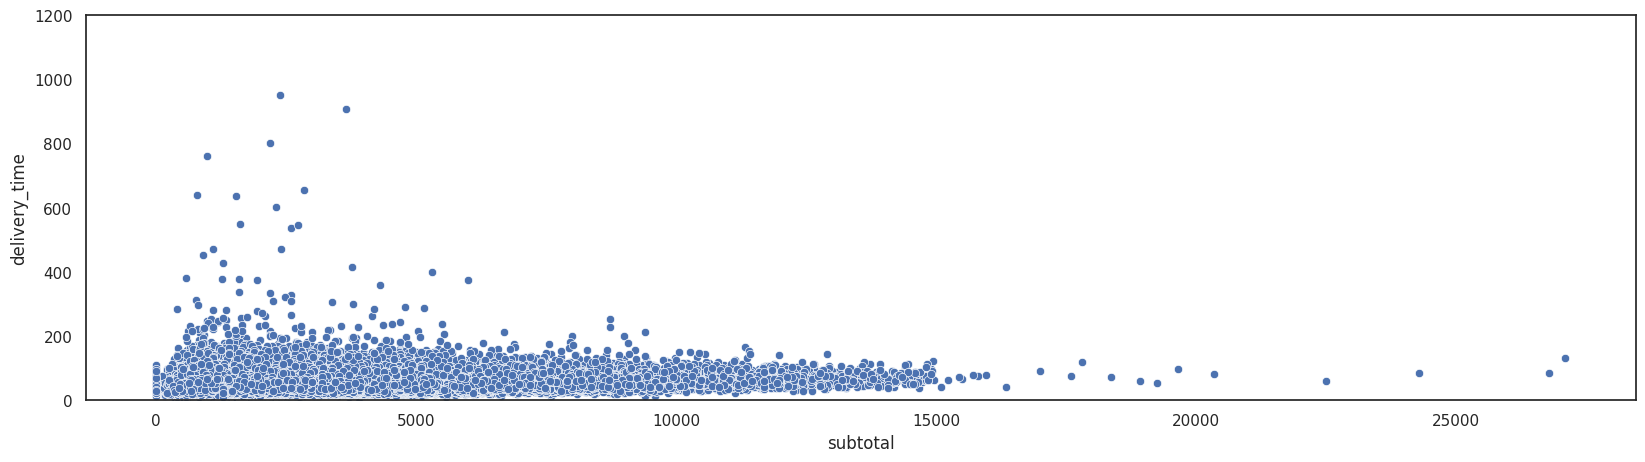

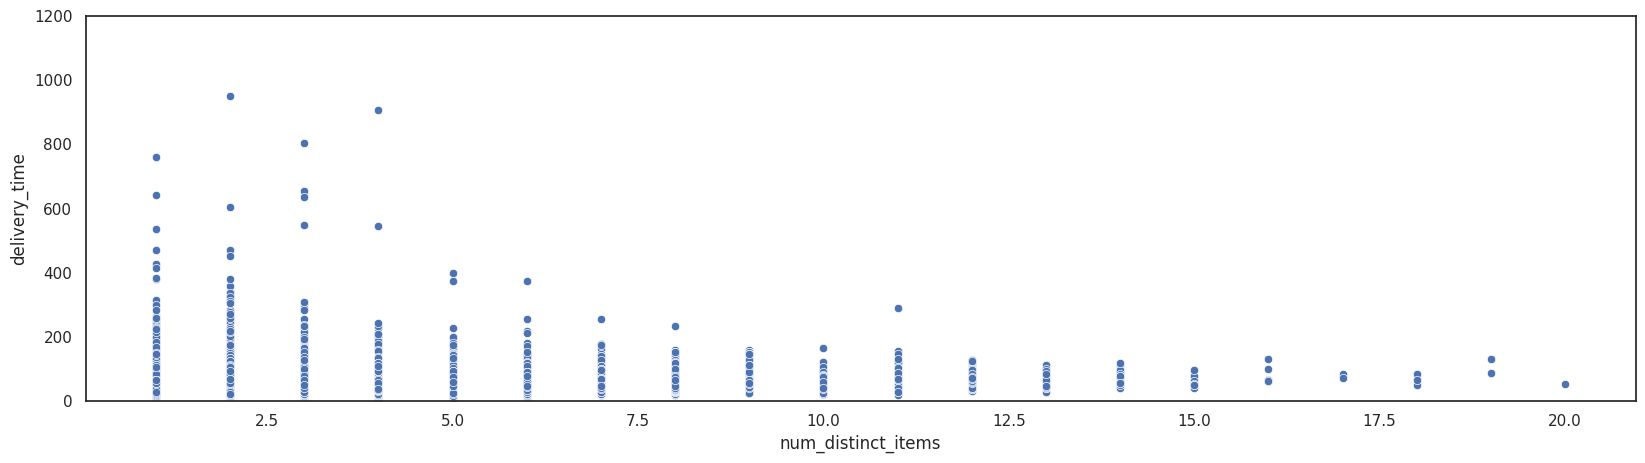

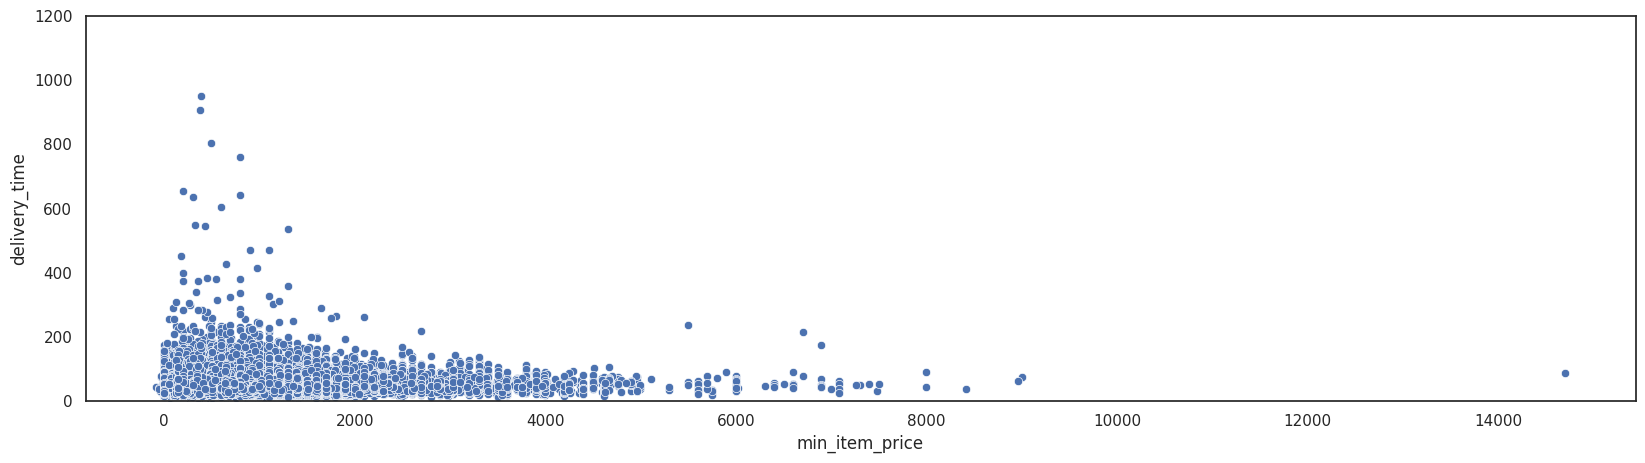

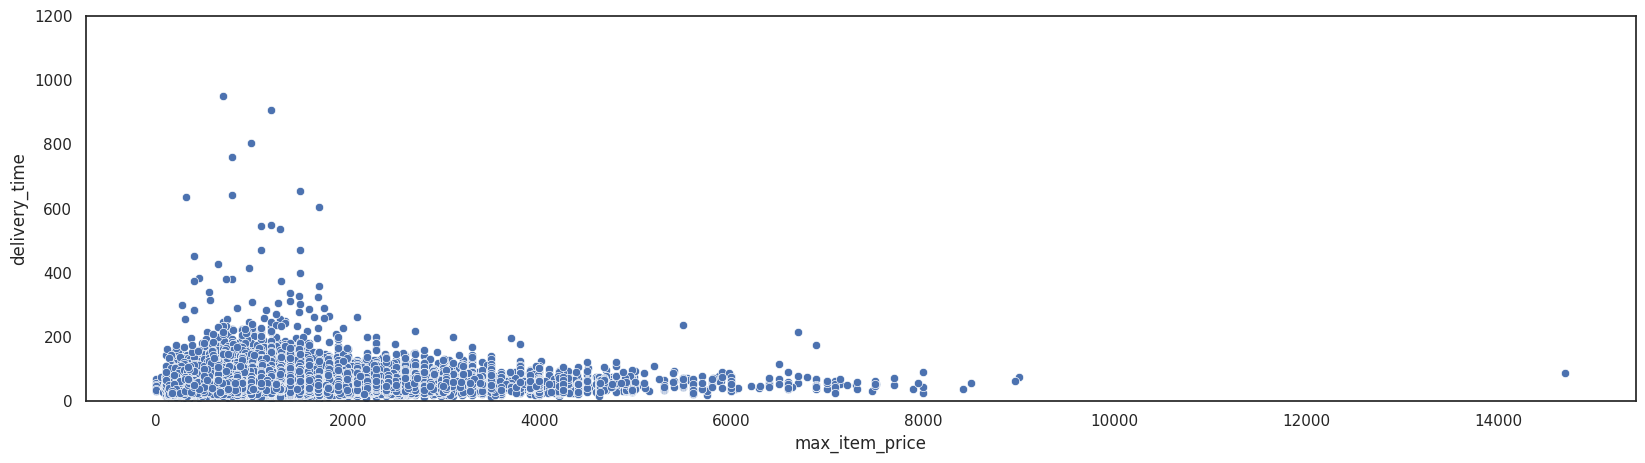

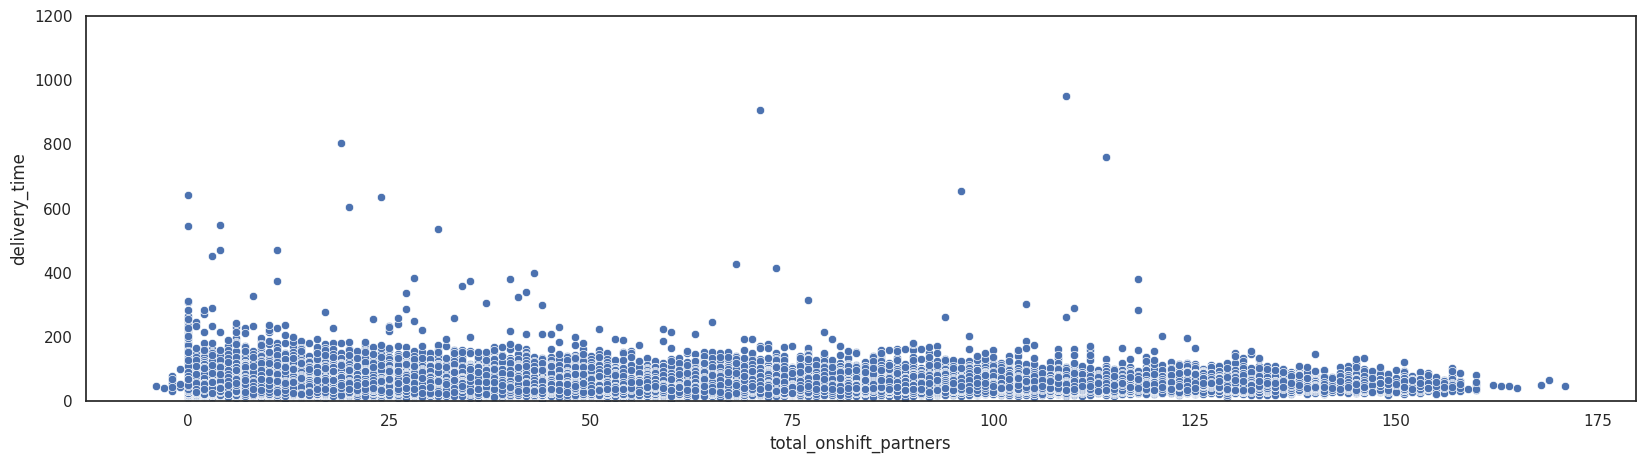

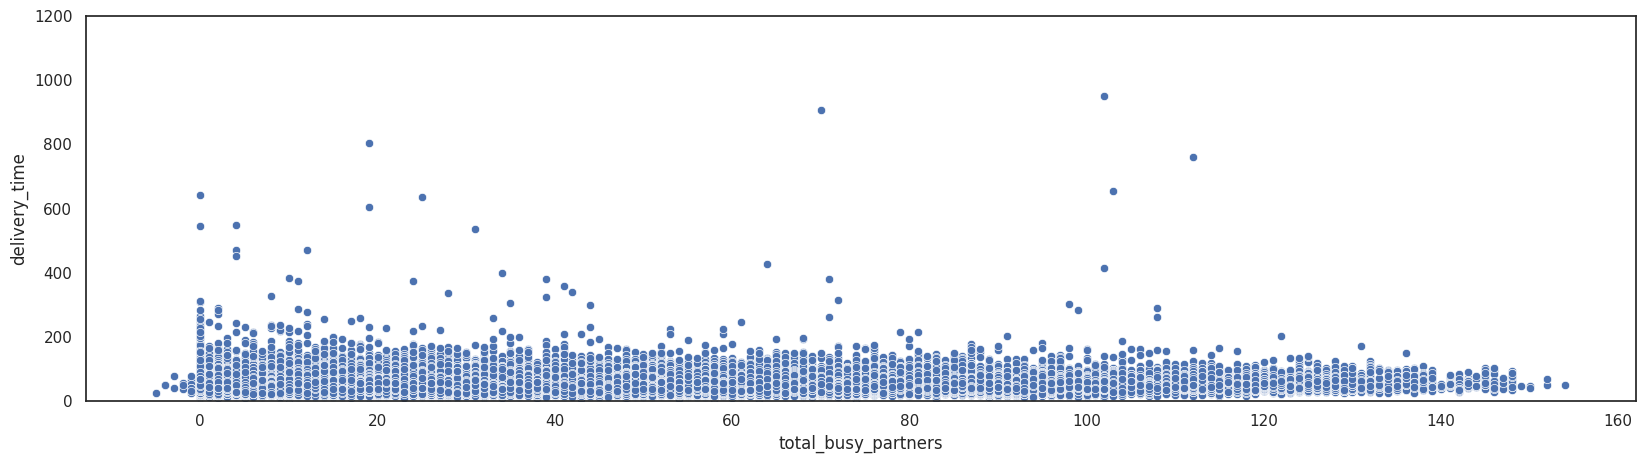

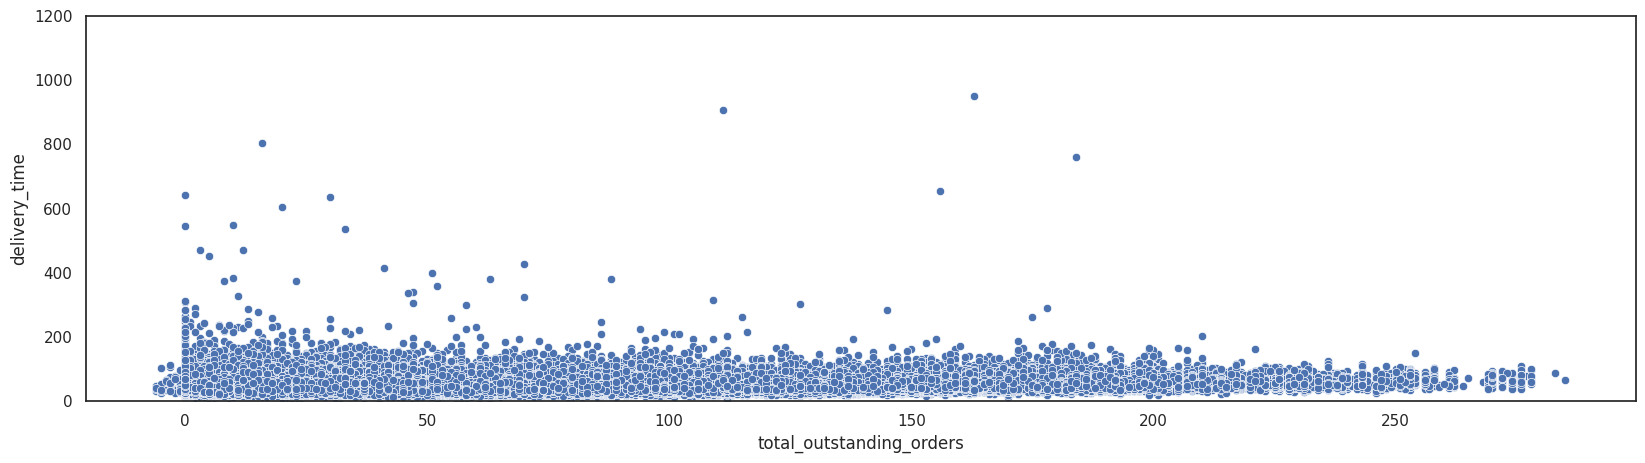

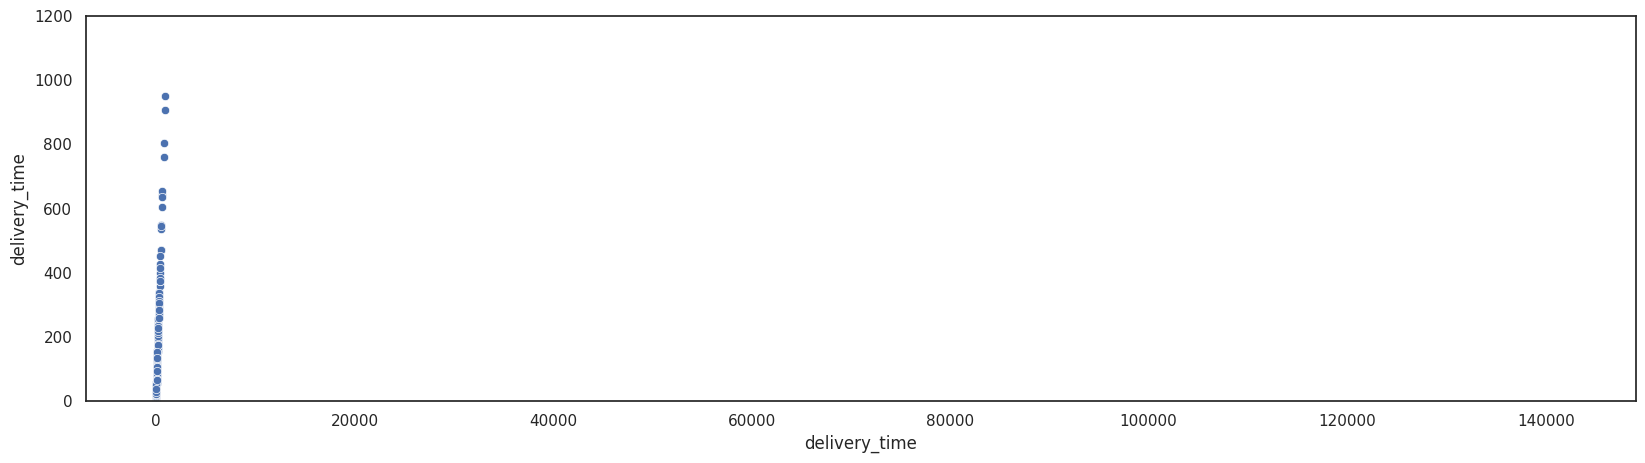

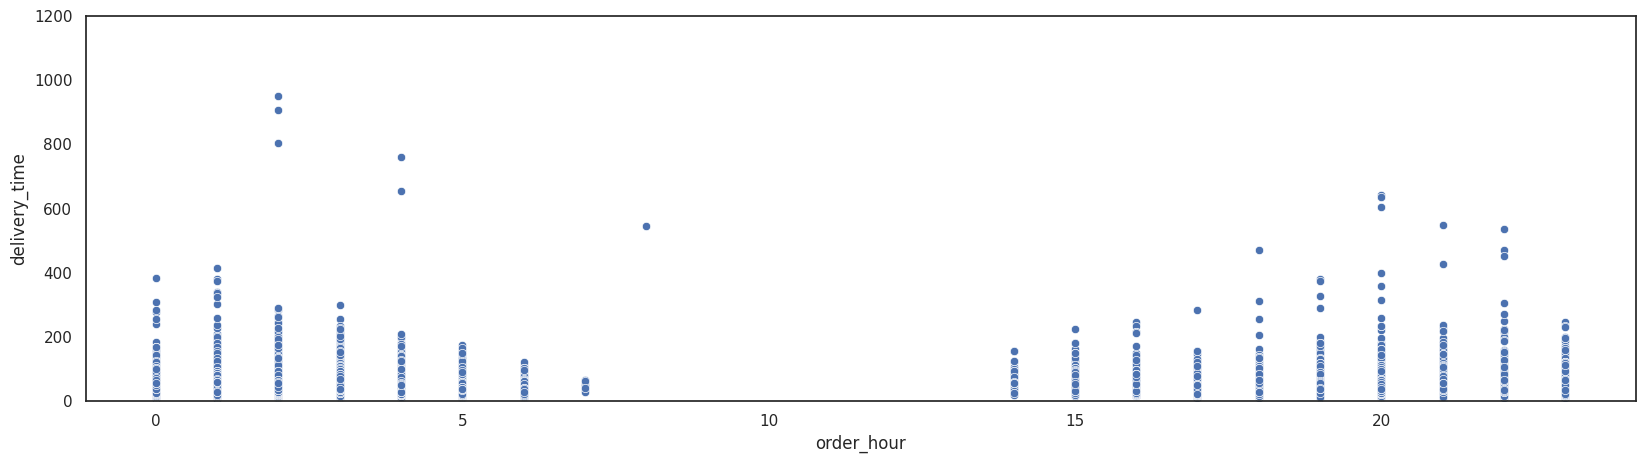

In [ ]:
for feature in df_num.columns:
  fig, ax = plt.subplots(figsize=(20, 5))
  sns.scatterplot(y = df_num['delivery_time'], x = df_num[feature])
  ax.set_ylim([0,1200])

(0.0, 1100.0)

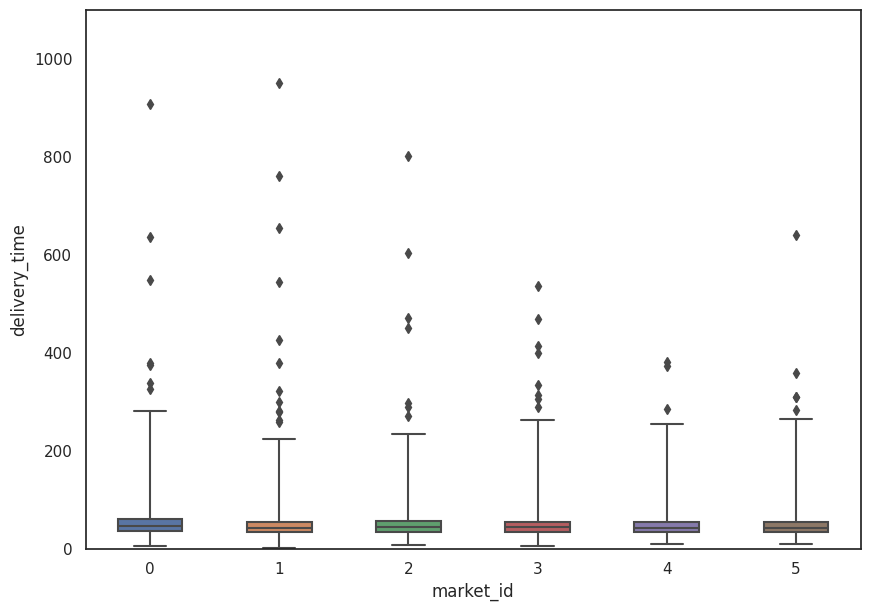

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(y = df['delivery_time'], x = df['market_id'],width=0.5,whis = 10)
ax.set_ylim([0,1100])

<Axes: xlabel='subtotal', ylabel='total_items'>

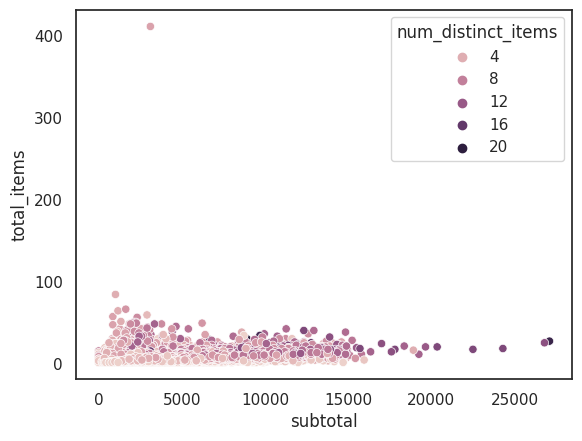

In [ ]:
sns.scatterplot(y='total_items',x='subtotal',hue='num_distinct_items',data=df_num)

(0.0, 1100.0)

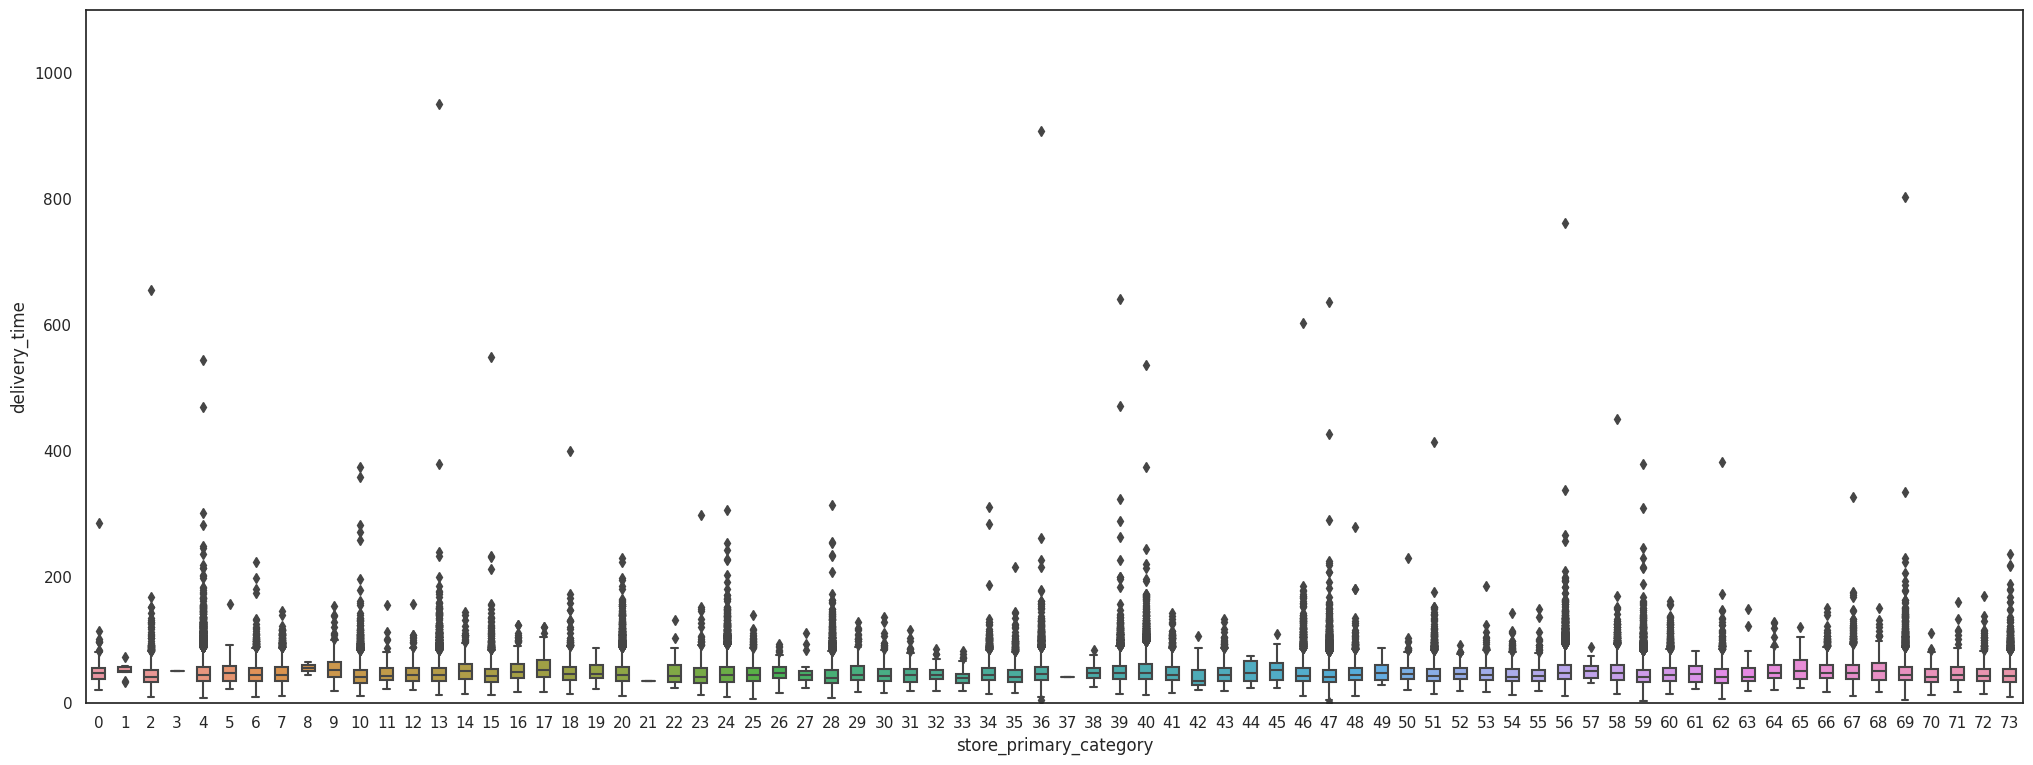

In [ ]:
fig, ax = plt.subplots(figsize=(25, 9))
sns.boxplot(y = df['delivery_time'], x = df['store_primary_category'],width=0.5)
ax.set_ylim([0,1100])

(0.0, 1800.0)

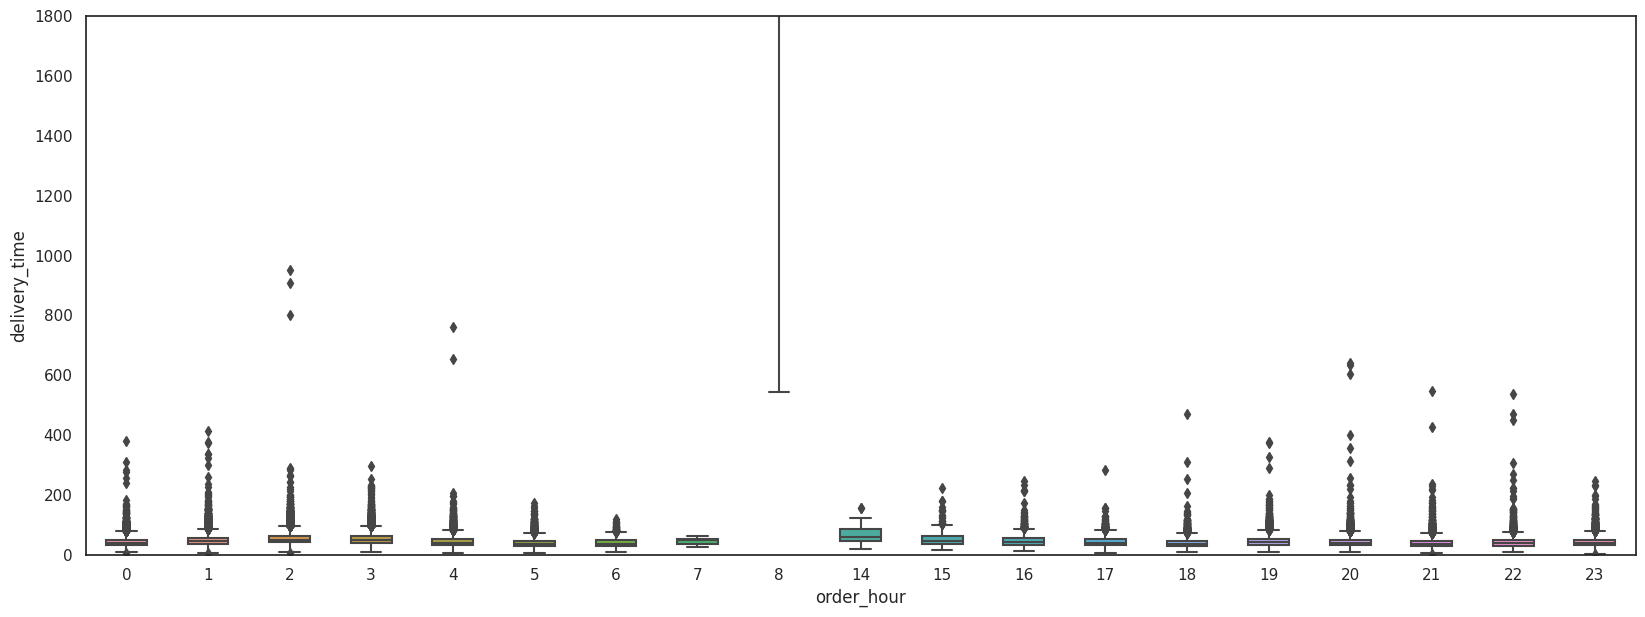

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.boxplot(y = df['delivery_time'], x = df['order_hour'],width=0.5)
ax.set_ylim([0,1800])

**Observations**
* There is no specific relationship between delivery time with sub total and total onshift partners,although the time is peaking when the partners are below 25.
* The delivery time increases as the total number of items ordered increases

**Outlier Treatment**

In [ ]:
def outlier_analysis(x):
  Q3, Q1 = np.percentile(x, [75 ,25])
  IQR = Q3 - Q1
  maxExcludingOutlier = Q3 + 1.5 * IQR
  minExcludingOutlier = Q1 - 1.5 * IQR
  mean = round(x.mean(),2)
  median = round(x.median(),2)
  mode = round(x.mode(), 2)
  print("Q1: ", round(Q1, 2))
  print("Q3: ", round(Q3, 2))
  print("Mean: ", round(x.mean(),2))
  print("Median: ", round(x.median(),2))
  print("Mode: " , round(x.mode()[0], 2))
  print("IQR: " , round(IQR, 2))
  print("Maximum" +"Excluding Outlier: " , round(maxExcludingOutlier, 2))
  print("Minimum" + "Purchase Excluding Outlier: " , round(minExcludingOutlier,2))
  print('\033[1m' + 100 * "-" + '\033[0m')

In [ ]:
for x in df.columns:
  print('\033[1m' + "Outlier Analysis for "+x+ '\033[0m')
  outlier_analysis(df[x])

Outlier Analysis for total_items
Q1:  2.0
Q3:  4.0
Mean:  3.2
Median:  3.0
Mode:  2
IQR:  2.0
MaximumExcluding Outlier:  7.0
MinimumPurchase Excluding Outlier:  -1.0
----------------------------------------------------------------------------------------------------
Outlier Analysis for subtotal
Q1:  1400.0
Q3:  3395.0
Mean:  2682.23
Median:  2200.0
Mode:  1500
IQR:  1995.0
MaximumExcluding Outlier:  6387.5
MinimumPurchase Excluding Outlier:  -1592.5
----------------------------------------------------------------------------------------------------
Outlier Analysis for num_distinct_items
Q1:  1.0
Q3:  3.0
Mean:  2.67
Median:  2.0
Mode:  2
IQR:  2.0
MaximumExcluding Outlier:  6.0
MinimumPurchase Excluding Outlier:  -2.0
----------------------------------------------------------------------------------------------------
Outlier Analysis for min_item_price
Q1:  299.0
Q3:  949.0
Mean:  686.26
Median:  595.0
Mode:  795
IQR:  650.0
MaximumExcluding Outlier:  1924.0
MinimumPurchase Excluding

In [ ]:
def iqr(column_name):
      q1 = df[column_name].quantile(0.10)
      q3 = df[column_name].quantile(0.90)
      iqr = q3 - q1
      lower_threshold = q1 - 1.5 * iqr
      upper_threshold = q3 + 1.5 * iqr

      # Winsorize the outliers
      df[column_name] = np.where(df[column_name] < lower_threshold, lower_threshold, df[column_name])
      df[column_name] = np.where(df[column_name] > upper_threshold, upper_threshold, df[column_name])

In [ ]:
col_name=['subtotal','num_distinct_items','total_items', 'min_item_price', 'max_item_price',
                'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
for i in col_name:
  iqr(i)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model1=LocalOutlierFactor()
df['LOF_anomaly_score']=model1.fit_predict(df)

In [ ]:
print("Number of Outliers : ",(len(df.loc[(df['LOF_anomaly_score'] == -1)])))
df=df.loc[(df['LOF_anomaly_score'] == 1)]

Number of Outliers :  2067


In [ ]:
df.drop(['LOF_anomaly_score'],axis=1,inplace=True)

**Data Analysis after Outlier Removal**

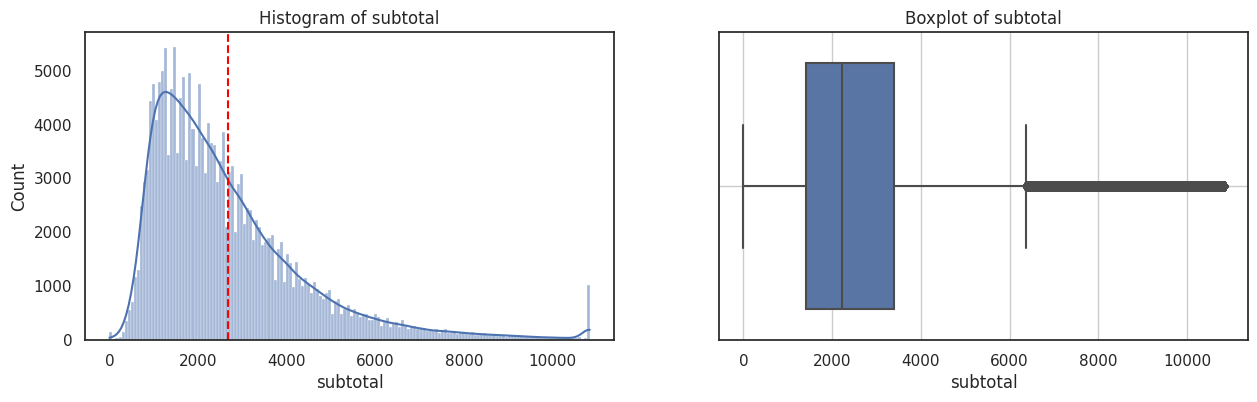

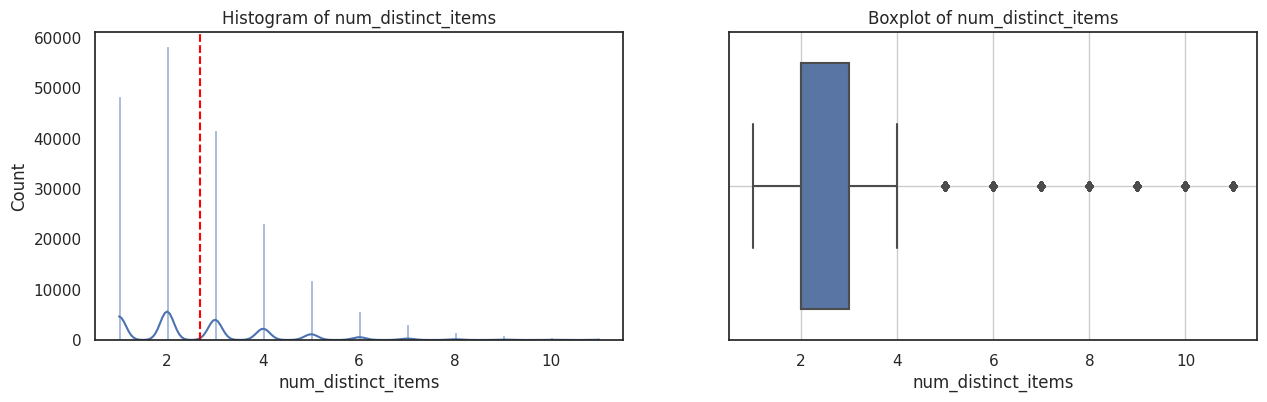

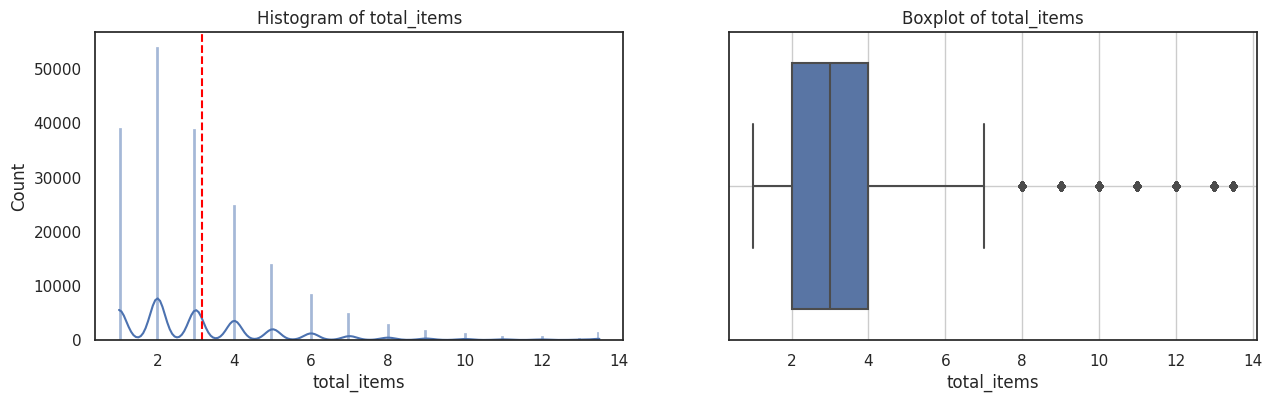

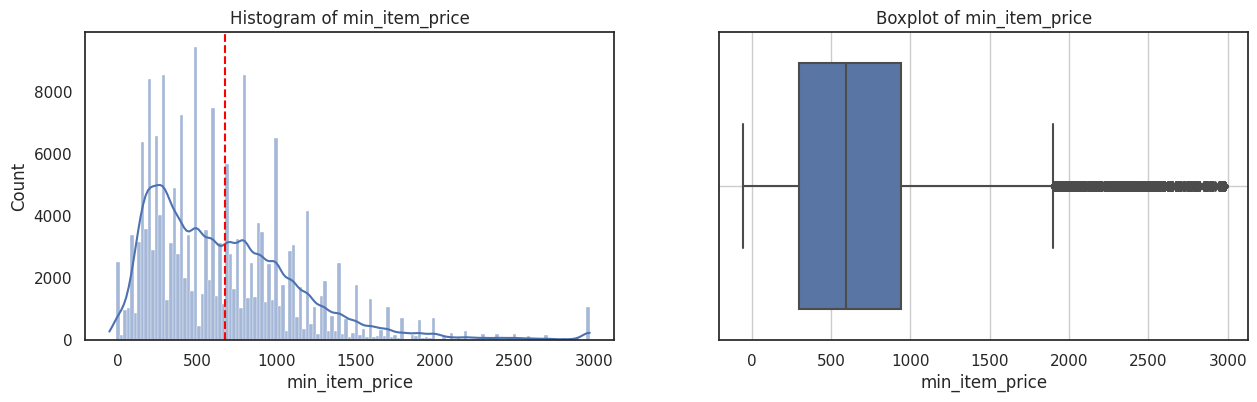

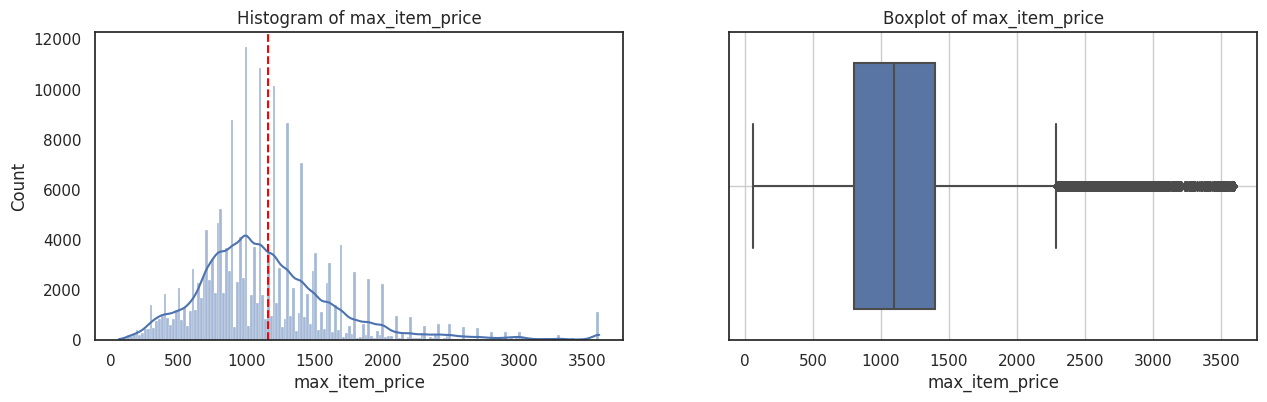

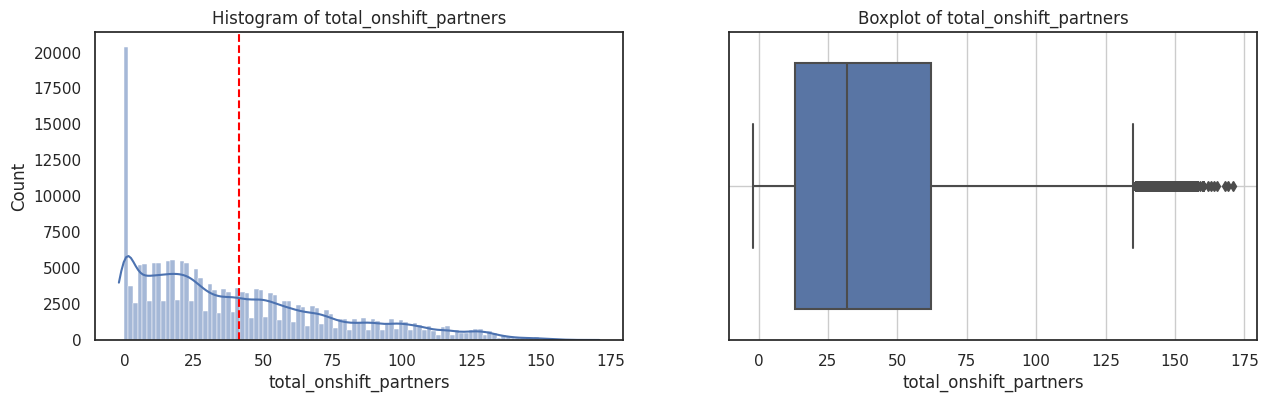

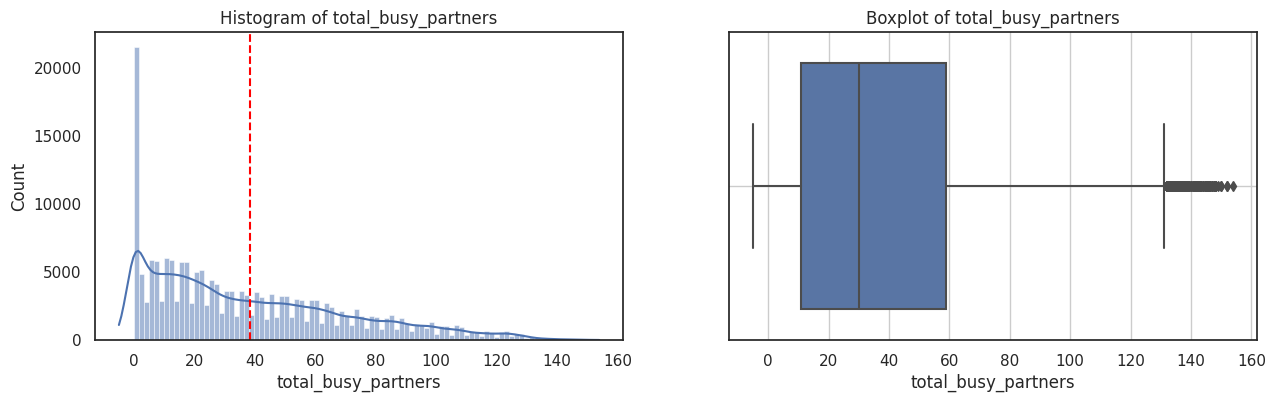

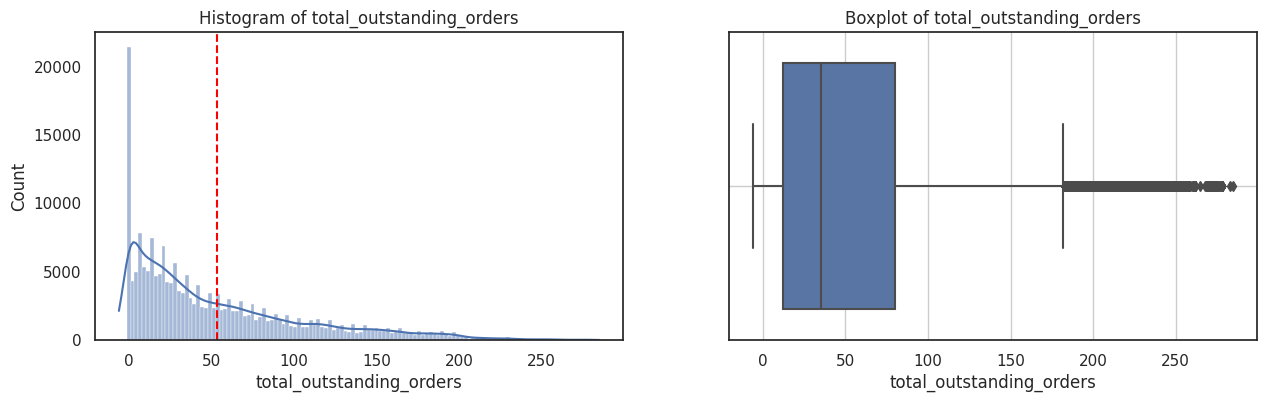

In [ ]:
for i in col_name:
    univariate(df[i],str(i))

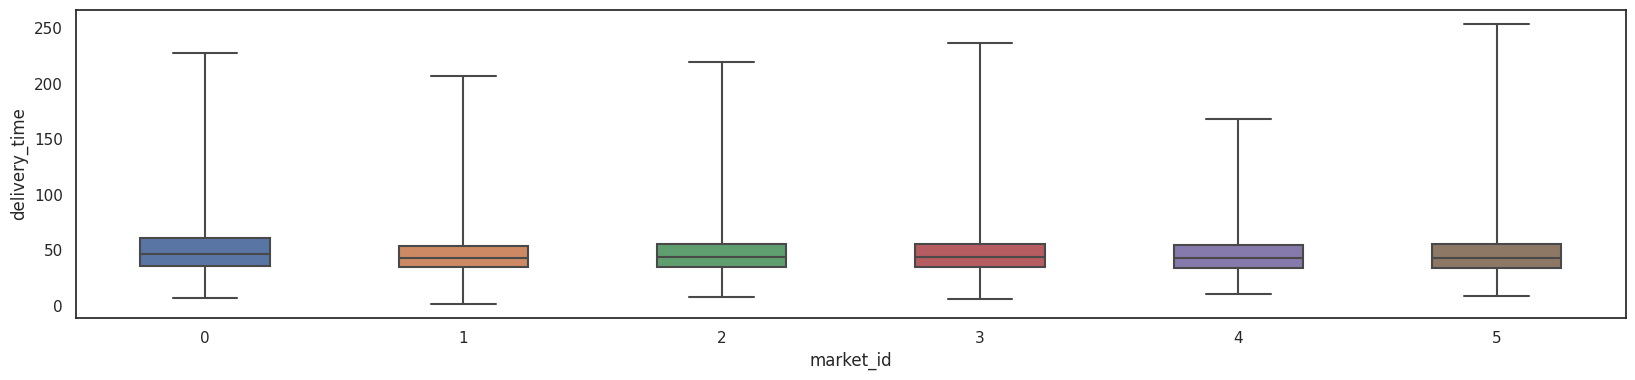

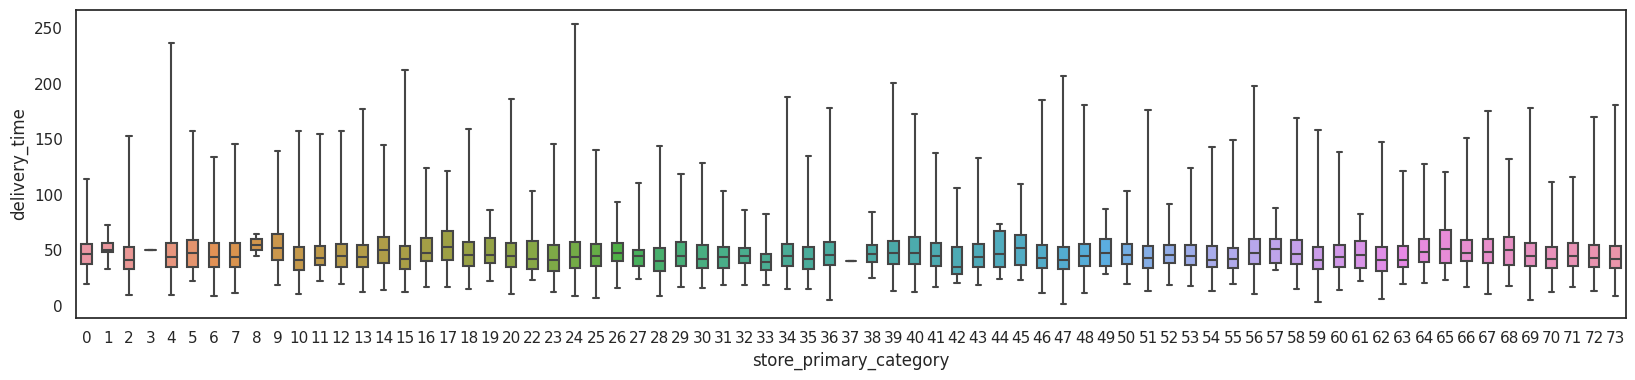

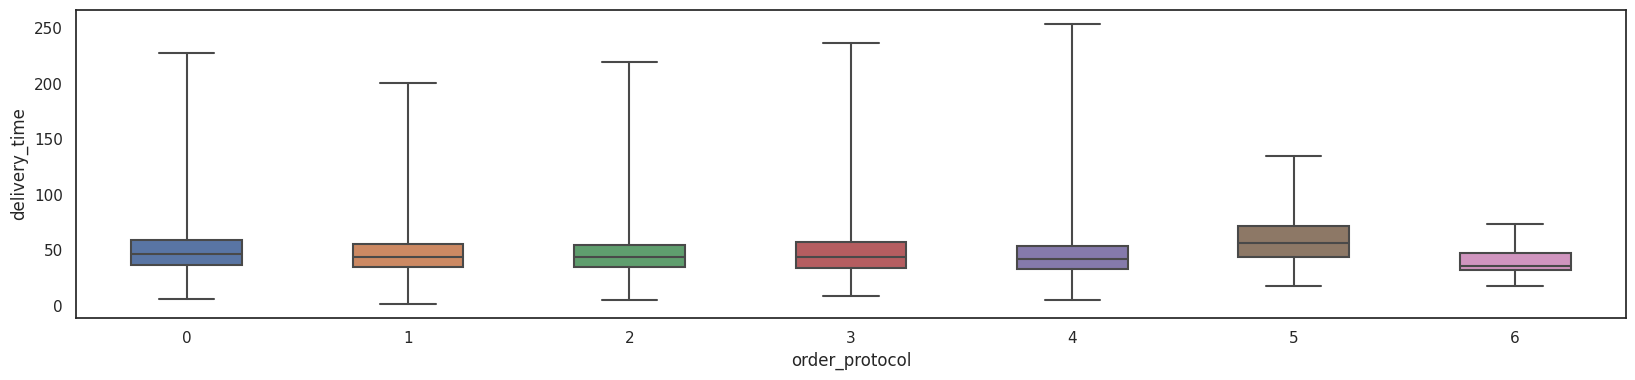

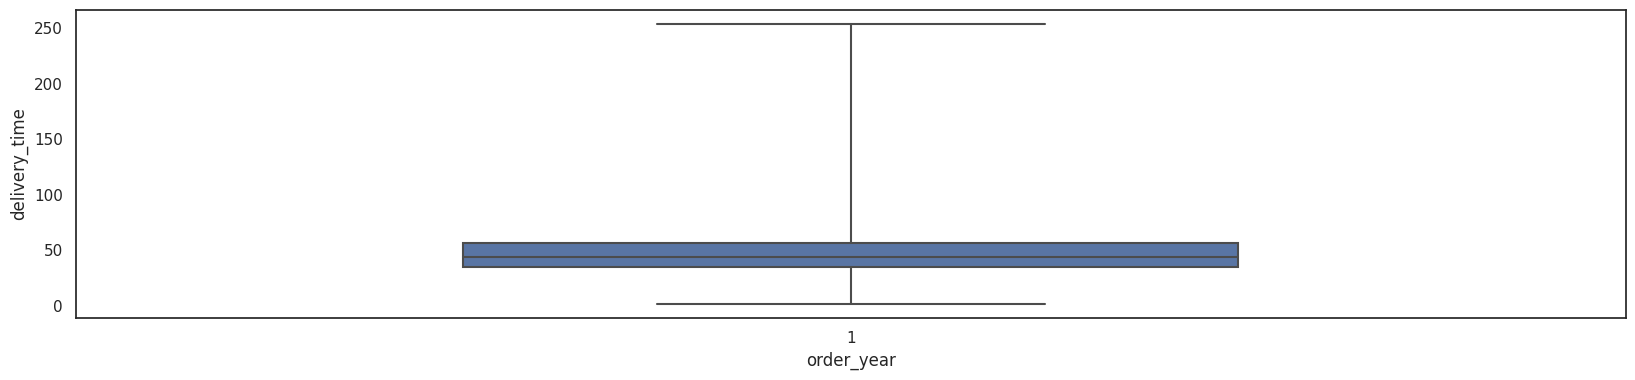

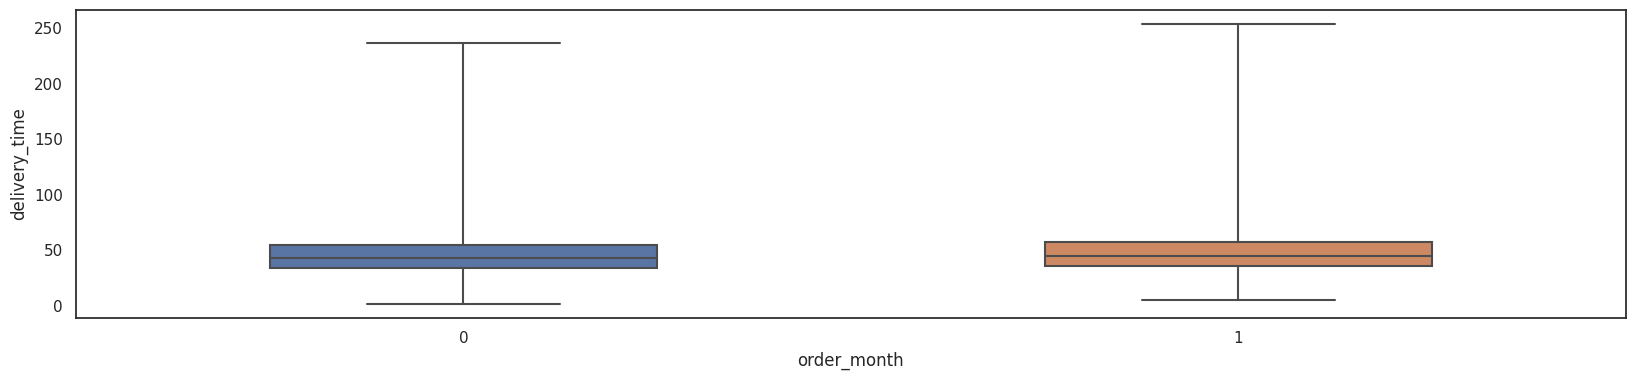

In [ ]:
cat_columns = ['market_id', 'store_primary_category', 'order_protocol', 'order_year', 'order_month']
for feature in cat_columns:
  fig, ax = plt.subplots(figsize=(20, 4))
  sns.boxplot(y = df['delivery_time'], x = df[feature],width=0.5,whis = 10)

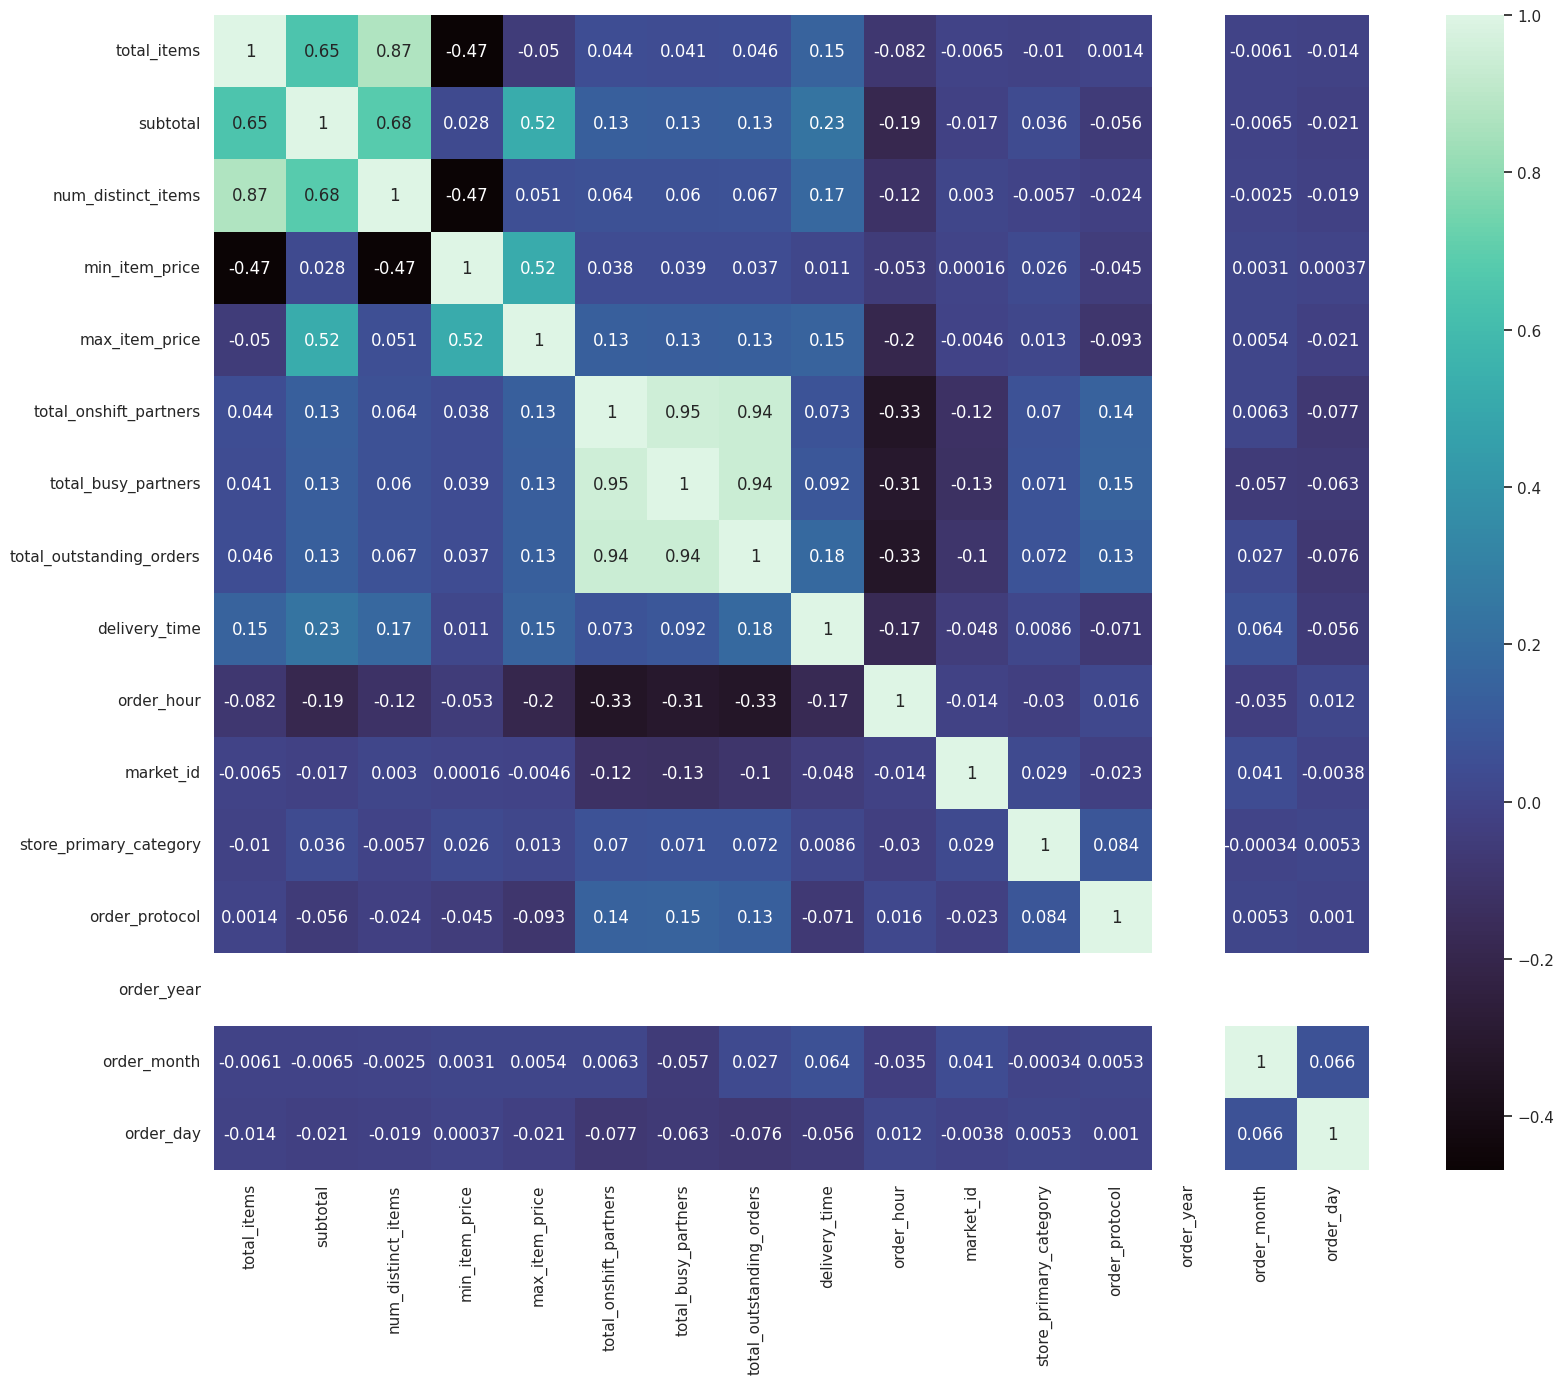

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(method='pearson'), square=True,annot=True, cmap="mako")
plt.show()


## **Observations :-**

1. Market with market_id = 1 has the highest count, while market with market_id = 5 has the Least Count.
2. Maximum Time is generally taken from Market 0, while Least amount of time is taken from Markets 1,3.
3. Order Protocol no 5 is considered the Maximum Number of Times while ordering from Porter
Application.
4. Maximum Number of Orders are done in February.
5. American , Pizza and Mexican food has been ordered the most number of Times.
6. Majority of the Orders are from Stores with Category Number 4.
7. Busiest Hours for Partners (Onshift / Busy) lies in between 12 am - 6 am , due to large number of
Outstanding Orders.
8. As per Heatmap , Onshift Partners, Busy Partners, and Outstanding Orders are all closely related to
each other.

In [ ]:
# we can see some features which are highly correlated (>0.9) we should drop these features.
df.drop(['total_outstanding_orders','total_busy_partners','num_distinct_items'],axis=1,inplace=True)

In [ ]:
for i in ['total_items','subtotal','min_item_price','max_item_price',"total_onshift_partners"]:
    df[i]=df[i].astype('int64')

## **Model Training**

In [ ]:
X = df.drop(['delivery_time'], axis=1)
y = df['delivery_time']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test  = train_test_split(X,y, train_size=0.8, random_state=1221)

In [ ]:
print("Train : ",X_train.shape,y_train.shape)
print("Test :",X_test.shape,y_test.shape)

Train :  (155087, 12) (155087,)
Test : (38772, 12) (38772,)


In [ ]:
! pip install category_encoders

In [ ]:
import category_encoders as ce

#encoding
enc = ce.TargetEncoder(cols=['market_id','store_primary_category','order_protocol','order_day','order_hour'])

X_train = enc.fit_transform(X_train, y_train)
X_test = enc.transform(X_test, y_test)

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(n_jobs=-1)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error

# Evaluation metrics - Linear Regression
print("Evaluation metrics for Linear Regression")

r2_lr = r2_score(y_test,y_pred_lr)
print(f'> R2 Score : {r2_lr.round(3)}')
mse_lr = mean_squared_error(y_test,y_pred_lr)
rmse_lr = mse_lr**.5
print("> Mean Squared Error : ",mse_lr.round(3))
print("> Root Mean Squared Error : ",rmse_lr.round(3))
mae_lr = mean_absolute_error(y_test,y_pred_lr)
print("> Mean Absolute Error : ",mae_lr.round(3))
mape_lr=np.mean(np.abs((y_test - y_pred_lr)/y_test))*100
print("> Mean Absolute Percentage Error : ",mape_lr.round(3))
acc_lr = 100 - mape_lr
print("> Accuracy : ",acc_lr.round(3),'%')

Evaluation metrics for Linear Regression
> R2 Score : 0.155
> Mean Squared Error :  265.819
> Root Mean Squared Error :  16.304
> Mean Absolute Error :  12.226
> Mean Absolute Percentage Error :  28.539
> Accuracy :  71.461 %


### **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluation metrics - Random Forest
print("Evaluation metrics for Random Forest")

r2_rf = r2_score(y_test,y_pred_rf)
print(f'> R2 Score : {r2_rf.round(3)}')
mse_rf = mean_squared_error(y_test,y_pred_rf)
rmse_rf = mse_rf**.5
print("> Mean Squared Error : ",mse_rf.round(3))
print("> Root Mean Squared Error : ",rmse_rf.round(3))
mae_rf = mean_absolute_error(y_test,y_pred_rf)
print("> Mean Absolute Error : ",mae_rf.round(3))
mape_rf=np.mean(np.abs((y_test - y_pred_rf)/y_test))*100
print("> Mean Absolute Percentage Error : ",mape_rf.round(3))
acc_rf = 100 - mape_rf
print("> Accuracy : ",acc_rf.round(3),"%")

Evaluation metrics for Random Forest
> R2 Score : 0.222
> Mean Squared Error :  244.98
> Root Mean Squared Error :  15.652
> Mean Absolute Error :  11.776
> Mean Absolute Percentage Error :  27.658
> Accuracy :  72.342 %


## **Neural Network Models**



In [ ]:
# Neural Net modules
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import regularizers

%load_ext tensorboard
log_folder = 'logs'
%reload_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard
tb_callback = TensorBoard(log_dir = log_folder , histogram_freq = 1)


**a) Model with ReLU Activation Function**

In [ ]:
# model 1 - Relu
model_1 = keras.Sequential()

# Add layers to the model
model_1.add(keras.layers.Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(keras.layers.Dense(units=64, activation='relu'))
model_1.add(keras.layers.Dense(units=32, activation='relu'))
model_1.add(keras.layers.Dense(units=16, activation='relu'))
model_1.add(keras.layers.Dense(units=8, activation='relu'))
model_1.add(keras.layers.Dense(units=1,activation='linear'))  # Output layer

In [ ]:
# Compile the model
model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights = True)

# Define model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('model_1', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min')

# Train the model
history = model_1.fit(X_train, y_train, epochs=100, batch_size=128,  validation_split=0.2,
                      callbacks=[model_checkpoint,early_stopping])

# Load the model
model_1 = keras.models.load_model('model_1')
y_pred_nn= model_1.predict(X_test).flatten()
model_1.summary()

Epoch 1/100
970/970 [==============================] - 6s 5ms/step - loss: 395.9885 - mae: 14.4297 - val_loss: 268.2742 - val_mae: 12.1365
Epoch 2/100
970/970 [==============================] - 3s 4ms/step - loss: 260.7752 - mae: 12.1184 - val_loss: 264.0453 - val_mae: 12.4718
Epoch 3/100
970/970 [==============================] - 4s 4ms/step - loss: 258.2899 - mae: 12.0596 - val_loss: 261.2811 - val_mae: 12.3713
Epoch 4/100
970/970 [==============================] - 5s 5ms/step - loss: 257.0897 - mae: 12.0215 - val_loss: 258.7726 - val_mae: 12.1900
Epoch 5/100
970/970 [==============================] - 3s 3ms/step - loss: 255.9371 - mae: 11.9999 - val_loss: 261.1748 - val_mae: 12.4060
Epoch 6/100
970/970 [==============================] - 3s 3ms/step - loss: 255.8730 - mae: 11.9954 - val_loss: 260.6056 - val_mae: 11.9930
Epoch 7/100
970/970 [==============================] - 4s 4ms/step - loss: 255.0478 - mae: 11.9782 - val_loss: 259.3829 - val_mae: 11.9357
Epoch 8/100
970/970 [======

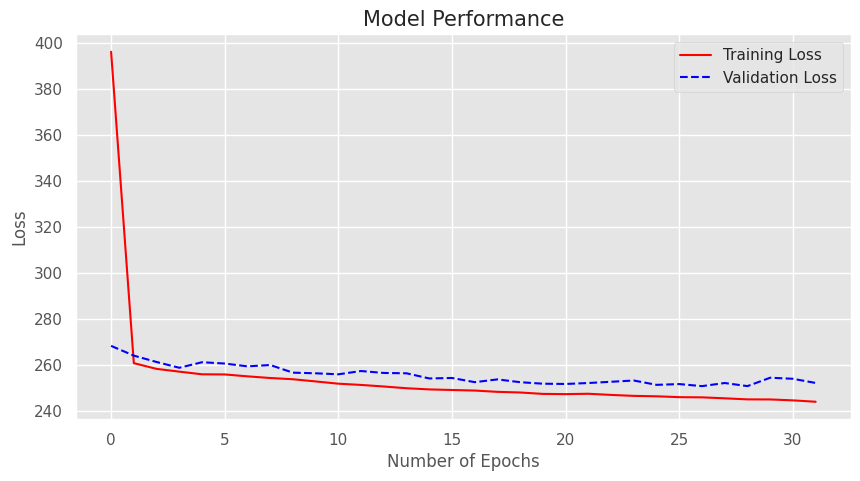

In [ ]:
# Plot the loss graph and accuracy graph
h = history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='blue', linestyle='--', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.title('Model Performance', fontsize=15)
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

In [ ]:
# Evaluation metrics - Neural Networks
print("Evaluation metrics for Neural Network model with Relu Activation")

r2_nn = r2_score(y_test,y_pred_nn)
print(f'> R2 Score : {r2_nn.round(3)}')
mse_nn = mean_squared_error(y_test,y_pred_nn)
rmse_nn = mse_nn**.5
print("> Mean Squared Error : ",mse_nn.round(3))
print("> Root Mean Squared Error : ",rmse_nn.round(3))
mae_nn = mean_absolute_error(y_test,y_pred_nn)
print("> Mean Absolute Error : ",mae_nn.round(3))
mape_nn=np.mean(np.abs((y_test - y_pred_nn)/y_test))*100
print("> Mean Absolute Percentage Error : ",mape_nn.round(3))
acc_nn = 100 - mape_nn
print("> Accuracy : ",acc_nn.round(3),"%")

Evaluation metrics for Neural Network model with Relu Activation
> R2 Score : 0.21
> Mean Squared Error :  248.794
> Root Mean Squared Error :  15.773
> Mean Absolute Error :  11.746
> Mean Absolute Percentage Error :  27.102
> Accuracy :  72.898 %


**b) Model with ReLU Activation Function + Batch Normalization & Dropout**

In [ ]:
model_nn_relu = keras.Sequential()

# Add layers to the model
model_nn_relu.add(keras.layers.Dense(units=128, activation='relu', input_shape=(12,)))
model_nn_relu.add(BatchNormalization())
model_nn_relu.add(Dropout(0.2))
model_nn_relu.add(keras.layers.Dense(units=64, activation='relu',  kernel_regularizer=keras.regularizers.l2(0.1)))
model_nn_relu.add(BatchNormalization())
model_nn_relu.add(Dropout(0.2))
model_nn_relu.add(keras.layers.Dense(units=32, activation='relu',  kernel_regularizer=keras.regularizers.l2(0.1)))
model_nn_relu.add(BatchNormalization())
model_nn_relu.add(keras.layers.Dense(units=16, activation='relu',  kernel_regularizer=keras.regularizers.l2(0.1)))
model_nn_relu.add(BatchNormalization())

model_nn_relu.add(keras.layers.Dense(units=8, activation='relu',  kernel_regularizer=keras.regularizers.l2(0.1)))

model_nn_relu.add(keras.layers.Dense(units=1,activation='linear'))  # Output layer

# Compile the model
model_nn_relu.compile(optimizer='adam', loss='mean_squared_error',metrics = ['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Define model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_NN_model_relu', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min')

# Train the model
history = model_nn_relu.fit(X_train, y_train, epochs=100, batch_size=128,  validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Load the best model
best_model_relu = keras.models.load_model('best_NN_model_relu')
loss_relu = best_model_relu.evaluate(X_test, y_test)
best_model_relu.summary()


Epoch 1/100
970/970 [==============================] - 10s 8ms/step - loss: 670.8784 - mae: 18.8937 - val_loss: 280.5657 - val_mae: 12.2570
Epoch 2/100
970/970 [==============================] - 7s 7ms/step - loss: 279.8474 - mae: 12.2030 - val_loss: 274.7864 - val_mae: 12.1102
Epoch 3/100
970/970 [==============================] - 8s 9ms/step - loss: 274.5384 - mae: 12.1532 - val_loss: 271.1904 - val_mae: 12.0463
Epoch 4/100
970/970 [==============================] - 7s 7ms/step - loss: 271.1689 - mae: 12.1200 - val_loss: 270.0372 - val_mae: 12.2226
Epoch 5/100
970/970 [==============================] - 8s 8ms/step - loss: 268.7024 - mae: 12.1024 - val_loss: 267.5532 - val_mae: 12.0659
Epoch 6/100
970/970 [==============================] - 7s 8ms/step - loss: 266.8080 - mae: 12.0717 - val_loss: 267.0170 - val_mae: 12.1793
Epoch 7/100
970/970 [==============================] - 7s 8ms/step - loss: 265.8265 - mae: 12.0607 - val_loss: 266.8167 - val_mae: 12.1061
Epoch 8/100
970/970 [=====

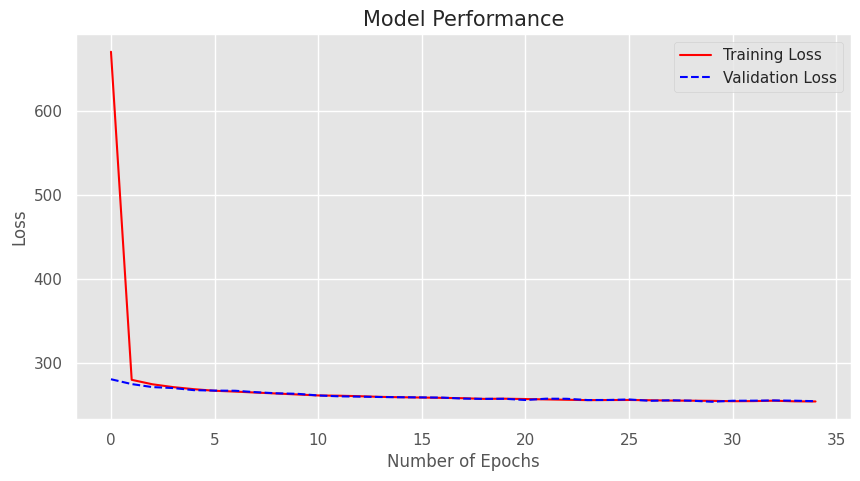

In [ ]:
# Plot the loss graph and accuracy graph
h = history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='blue', linestyle='--', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.title('Model Performance', fontsize=15)
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

In [ ]:
y_pred_nn= model_nn_relu.predict(X_test).flatten()
# Evaluation metrics - Neural Networks
print("Evaluation metrics for Neural Network model (ReLU)")

r2_nn_relu = r2_score(y_test,y_pred_nn)
print(f'> R2 Score : {r2_nn_relu.round(3)}')
mse_nn_relu = mean_squared_error(y_test,y_pred_nn)
rmse_nn_relu = mse_nn_relu**.5
print("> Mean Squared Error : ",mse_nn_relu.round(3))
print("> Root Mean Squared Error : ",rmse_nn_relu.round(3))
mae_nn_relu = mean_absolute_error(y_test,y_pred_nn)
print("> Mean Absolute Error : ",mae_nn_relu.round(3))
mape_nn_relu=np.mean(np.abs((y_test - y_pred_nn)/y_test))*100
print("> Mean Absolute Percentage Error : ",mape_nn_relu.round(3))
acc_nn_relu = 100 - mape_nn_relu
print("> Accuracy : ",acc_nn_relu.round(3),"%")

1212/1212 [==============================] - 2s 2ms/step
Evaluation metrics for Neural Network model (ReLU)
> R2 Score : 0.209
> Mean Squared Error :  249.061
> Root Mean Squared Error :  15.782
> Mean Absolute Error :  11.738
> Mean Absolute Percentage Error :  27.053
> Accuracy :  72.947 %


In [ ]:
model_perf = pd.DataFrame({
    'Model(ReLU)' : ['Model w/t Batch Normalization & Dropout' ,'Model with Batch Normalization & Dropout'],
    'R2 Score'  : [ r2_nn,r2_nn_relu],
    'MAPE'      : [mape_nn, mape_nn_relu],
    'Accuracy' :[100 - mape_nn,100 - mape_nn_relu]
    }, columns = ['Model(ReLU)','R2 Score', 'MAPE','Accuracy'])

model_perf.sort_values(by='MAPE', ascending=False)

,Model(ReLU),R2 Score,MAPE,Accuracy
0,Model w/t Batch Normalization & Dropout,0.211691,27.752957,72.247043
1,Model with Batch Normalization & Dropout,0.208656,27.053448,72.946552


#### **Observations**
We consider two models with and without Batch Normalization & Dropout using ReLU activation function.We could observe better model performance when Batch Normalization and Dropout is introduced.


**c) Model with Tanh Activation Function**

In [ ]:
# model 2 - Tanh
model_2 = keras.Sequential()

# Add layers to the model
model_2.add(keras.layers.Dense(units=128, activation='tanh', input_shape=(X_train.shape[1],)))
model_2.add(keras.layers.Dense(units=64, activation='tanh'))
model_2.add(keras.layers.Dense(units=32, activation='tanh'))
model_2.add(keras.layers.Dense(units=16, activation='tanh'))
model_2.add(keras.layers.Dense(units=8, activation='tanh'))
model_2.add(keras.layers.Dense(units=1,activation='linear'))  # Output layer

In [ ]:
# Compile the model
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights = True)

# Define model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('model_2', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min')

# Train the model
history = model_1.fit(X_train, y_train, epochs=100, batch_size=128,  validation_split=0.2,
                      callbacks=[early_stopping,model_checkpoint])

# Load the model
model_2 = keras.models.load_model('model_2')
y_pred_nn= model_2.predict(X_test).flatten()
model_2.summary()

Epoch 1/100
970/970 [==============================] - 6s 4ms/step - loss: 245.4979 - mae: 11.7423 - val_loss: 256.0679 - val_mae: 11.7495
Epoch 2/100
970/970 [==============================] - 4s 4ms/step - loss: 245.3521 - mae: 11.7372 - val_loss: 253.6145 - val_mae: 11.8068
Epoch 3/100
970/970 [==============================] - 4s 4ms/step - loss: 244.8581 - mae: 11.7217 - val_loss: 251.3202 - val_mae: 11.8028
Epoch 4/100
970/970 [==============================] - 4s 4ms/step - loss: 244.5631 - mae: 11.7197 - val_loss: 253.1578 - val_mae: 11.7192
Epoch 5/100
970/970 [==============================] - 4s 4ms/step - loss: 244.3484 - mae: 11.7131 - val_loss: 250.1868 - val_mae: 11.9464
Epoch 6/100
970/970 [==============================] - 3s 3ms/step - loss: 244.2121 - mae: 11.7170 - val_loss: 250.8672 - val_mae: 11.7903
Epoch 7/100
970/970 [==============================] - 5s 5ms/step - loss: 243.8454 - mae: 11.6972 - val_loss: 249.9480 - val_mae: 11.8304
Epoch 8/100
970/970 [======

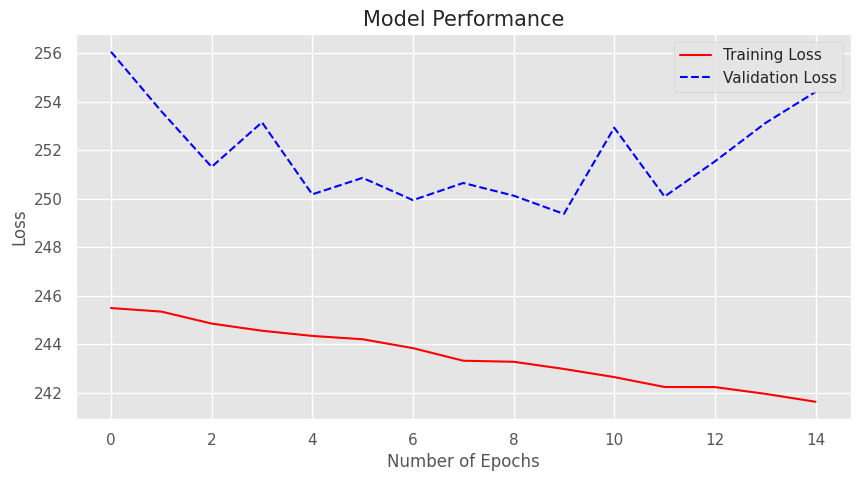

In [ ]:
# Plot the loss graph and accuracy graph
h = history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='blue', linestyle='--', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.title('Model Performance', fontsize=15)
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

In [ ]:
# Evaluation metrics - Neural Networks
print("Evaluation metrics for Neural Network model with Tanh Activation")

r2_nn = r2_score(y_test,y_pred_nn)
print(f'> R2 Score : {r2_nn.round(3)}')
mse_nn = mean_squared_error(y_test,y_pred_nn)
rmse_nn = mse_nn**.5
print("> Mean Squared Error : ",mse_nn.round(3))
print("> Root Mean Squared Error : ",rmse_nn.round(3))
mae_nn = mean_absolute_error(y_test,y_pred_nn)
print("> Mean Absolute Error : ",mae_nn.round(3))
mape_nn=np.mean(np.abs((y_test - y_pred_nn)/y_test))*100
print("> Mean Absolute Percentage Error : ",mape_nn.round(3))
acc_nn = 100 - mape_nn
print("> Accuracy : ",acc_nn.round(3),"%")

Evaluation metrics for Neural Network model with Tanh Activation
> R2 Score : 0.212
> Mean Squared Error :  248.106
> Root Mean Squared Error :  15.751
> Mean Absolute Error :  11.848
> Mean Absolute Percentage Error :  27.753
> Accuracy :  72.247 %


**d) Model with Tanh Activation Function + Batch Normalization & Dropout**

In [ ]:
model_nn_tanh = keras.Sequential()

# Add layers to the model
model_nn_tanh.add(keras.layers.Dense(units=128, activation='tanh', input_shape=(12,)))
model_nn_tanh.add(BatchNormalization())
model_nn_tanh.add(Dropout(0.2))
model_nn_tanh.add(keras.layers.Dense(units=64, activation='tanh',  kernel_regularizer=keras.regularizers.l2(0.1)))
model_nn_tanh.add(BatchNormalization())
model_nn_tanh.add(Dropout(0.2))
model_nn_tanh.add(keras.layers.Dense(units=32, activation='tanh',  kernel_regularizer=keras.regularizers.l2(0.1)))
model_nn_tanh.add(BatchNormalization())
model_nn_tanh.add(keras.layers.Dense(units=16, activation='tanh',  kernel_regularizer=keras.regularizers.l2(0.1)))
model_nn_tanh.add(BatchNormalization())

model_nn_tanh.add(keras.layers.Dense(units=8, activation='tanh',  kernel_regularizer=keras.regularizers.l2(0.1)))

model_nn_tanh.add(keras.layers.Dense(units=1,activation='linear'))  # Output layer

# Compile the model
model_nn_tanh.compile(optimizer='adam', loss='mean_squared_error',metrics = ['mae'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Define model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint('best_NN_model_tanh', save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min')

# Train the model
history = model_nn_tanh.fit(X_train, y_train, epochs=100, batch_size=128,  validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

# Load the best model
best_model_tanh = keras.models.load_model('best_NN_model_tanh')
# Evaluate the best model
loss_tanh = best_model_tanh.evaluate(X_test, y_test)
best_model_tanh.summary()


Epoch 1/100
970/970 [==============================] - 10s 8ms/step - loss: 1934.5128 - mae: 39.9804 - val_loss: 1532.7512 - val_mae: 34.7644
Epoch 2/100
970/970 [==============================] - 6s 7ms/step - loss: 1258.4565 - mae: 30.6119 - val_loss: 1042.7939 - val_mae: 26.9820
Epoch 3/100
970/970 [==============================] - 8s 8ms/step - loss: 856.4114 - mae: 23.5163 - val_loss: 714.2025 - val_mae: 20.6219
Epoch 4/100
970/970 [==============================] - 7s 7ms/step - loss: 592.1620 - mae: 18.1082 - val_loss: 504.9916 - val_mae: 16.2352
Epoch 5/100
970/970 [==============================] - 8s 8ms/step - loss: 432.2741 - mae: 14.8169 - val_loss: 386.9109 - val_mae: 13.9143
Epoch 6/100
970/970 [==============================] - 7s 7ms/step - loss: 348.8769 - mae: 13.3052 - val_loss: 328.3760 - val_mae: 12.9242
Epoch 7/100
970/970 [==============================] - 8s 8ms/step - loss: 308.1068 - mae: 12.6825 - val_loss: 306.0995 - val_mae: 12.9957
Epoch 8/100
970/970 [=

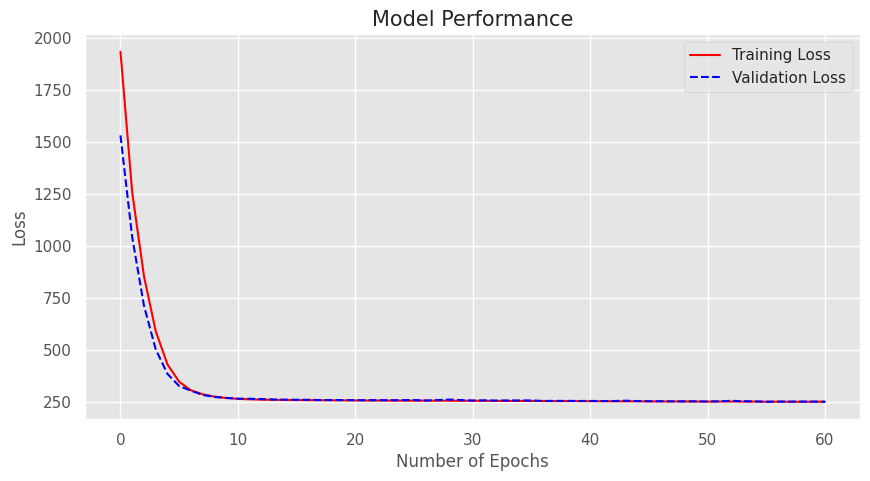

In [ ]:
# Plot the loss graph and accuracy graph
h = history.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='blue', linestyle='--', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.title('Model Performance', fontsize=15)
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show()

In [ ]:
y_pred_nn= model_nn_tanh.predict(X_test).flatten()
# Evaluation metrics - Neural Networks
print("Evaluation metrics for Neural Network model(Tanh)\n")

r2_nn_tanh = r2_score(y_test,y_pred_nn)
print(f'> R2 Score : {r2_nn.round(3)}')
mse_nn_tanh = mean_squared_error(y_test,y_pred_nn)
rmse_nn_tanh = mse_nn**.5
print("> Mean Squared Error : ",mse_nn_tanh.round(3))
print("> Root Mean Squared Error : ",rmse_nn_tanh.round(3))
mae_nn_tanh = mean_absolute_error(y_test,y_pred_nn)
print("> Mean Absolute Error : ",mae_nn_tanh.round(3))
mape_nn_tanh=np.mean(np.abs((y_test - y_pred_nn)/y_test))*100
print("> Mean Absolute Percentage Error : ",mape_nn_tanh.round(3))
acc_nn_tanh = 100 - mape_nn_tanh
print("> Accuracy : ",acc_nn_tanh.round(3),"%")

1212/1212 [==============================] - 2s 2ms/step
Evaluation metrics for Neural Network model(Tanh)

> R2 Score : 0.212
> Mean Squared Error :  249.808
> Root Mean Squared Error :  15.751
> Mean Absolute Error :  11.786
> Mean Absolute Percentage Error :  27.19
> Accuracy :  72.81 %


In [ ]:
model_perf = pd.DataFrame({
    'Model(Tanh)' : ['Model w/t Batch Normalization & Dropout' ,'Model with Batch Normalization & Dropout'],
    'R2 Score'  : [ r2_nn,r2_nn_tanh],
    'MAPE'      : [mape_nn, mape_nn_tanh],
    'Accuracy' :[100 - mape_nn,100 - mape_nn_tanh]
    }, columns = ['Model(Tanh)','R2 Score', 'MAPE','Accuracy'])

model_perf.sort_values(by='MAPE', ascending=False)

,Model(Tanh),R2 Score,MAPE,Accuracy
0,Model w/t Batch Normalization & Dropout,0.211691,27.752957,72.247043
1,Model with Batch Normalization & Dropout,0.206283,27.189935,72.810065


**Observations**

*   We tried ReLU activation while training neural network model which was not giving good MSE.
* When we used the Tanh activation function, the MSE of model improved.
*   Introducing drop out and batch normalisation improved the loss minimisation over each epoch
*   We used call backs model checkpoint to capture best model and early stopping to improve train timing.

## **Comparison of Model Performances**

In [ ]:
model_perf = pd.DataFrame({
    'Model' : ['Linear Regression', 'Random Forest', 'Neural Network(ReLU)','Neural Network(Tanh)'],
    'Mean Squared Error':[mse_lr,mse_rf,loss_relu[0],loss_tanh[0]],
    'R2 Score'  : [r2_lr, r2_rf, r2_nn_relu,r2_nn_tanh],
    'MAPE'      : [mape_lr, mape_rf, mape_nn_relu,mape_nn_tanh],
    'Accuracy' :[100 -mape_lr,100 - mape_rf,100 - mape_nn_relu,100 - mape_nn_tanh]
    }, columns = ['Model','Mean Squared Error','R2 Score', 'MAPE','Accuracy'])

model_perf.sort_values(by='MAPE', ascending=False)

,Model,Mean Squared Error,R2 Score,MAPE,Accuracy
0,Linear Regression,265.819286,0.155410,28.538513,71.461487
1,Random Forest,244.980463,0.221621,27.657975,72.342025
3,Neural Network(Tanh),252.067673,0.206283,27.189935,72.810065
2,Neural Network(ReLU),252.860107,0.208656,27.053448,72.946552


**Observations**
* Random Forest model has slightly similar MAPE and R2 score compared to Neural Network regressor model, we could say both the models working with same efficiency.
* Within the Neural network model, the model using tanh activation with batch normalization and dropout has better performance compared to model using relu function.
* The above models have performance not par to be used in production models the ways we can imporove this are by getting better quality data and trying out more combinations of hyper parameters for the neural networks.

## **Questionaire**

**1. Defining the problem statements and where can this and modifications of this be used?**

Porter, India's leading marketplace for intra-city logistics, dominates the $40 billion market and prioritizes enhancing the lives of over 150,000 driver-partners. With a track record of serving over 5 million customers, Porter collaborates with numerous restaurants to facilitate direct delivery to customers. The company aims to estimate delivery times based on factors such as order details, location, and available delivery partners.

**2. List 3 functions the pandas datetime provides with one line explanation.**

* pd.to_datetime: Converts strings or a sequence of strings into a Pandas Datetime object.
* dt.date(): Extracts the date component from a Pandas Datetime object.
* dt.time(): Extracts the time component from a Pandas Datetime object.

**3. Short note on datetime, timedelta, time span (period)**

* Datetime is a Python class representing date and time, useful for storing and manipulating temporal information.
* Timedelta represents a duration, allowing manipulation of time periods.
* Time span refers to a general period, specific or unspecified, and is applicable in various contexts.

**4. Why do we need to check for outliers in our data?**

Identifying outliers is crucial as they can distort statistical analyses, potentially leading to inaccurate conclusions. Outliers can skew results, hinder pattern recognition, and adversely impact predictive modeling, making it essential to detect and handle them appropriately using methods like visual inspection or statistical tests.

**5. Name 3 outlier removal methods?**

* Trimming: Removing extreme values from the dataset.
* Capping: Replacing extreme values with values just outside the outliers.
* IQR Filtering: Identifying and removing outliers using the Interquartile Range.

**6. What Classical Machine Learning Methods can we use other than Random Forest for Regression?**

Other regression methods include:

* Linear Regression: Models the relationship using a linear function.
* Support Vector Machines (SVM): Uses support vectors and linear/non-linear kernels.
* GBDT Regression: An ensembling technique using gradient boosting.
* Neural Networks: A powerful technique using interconnected nodes for regression.
* kNN Regression: Non-parametric regression based on the k-nearest neighbors.

**7. Why is scaling required for neural networks?**

Scaling is essential for neural networks for improved performance, reduced training time, and enhanced generalization. It ensures that all features are on a similar scale, preventing the network from being overly sensitive to any specific feature.

**8. Briefly explain your choice of optimizer.**

Adam is chosen for its stability, efficiency, and generalization capabilities. It is less prone to divergence, converges quickly, and can generalize well to new data, making it effective for neural networks.

**9. Which activation function did you use and why?**

The ReLU activation function was chosen for its speed, sparsity, stability, and generalization capabilities. It is computationally efficient, induces sparsity in networks, and is less likely to cause divergence during training.

**10. Why does a neural network perform well on a large dataset?**

The effectiveness of neural networks on large datasets stems from their capability to discern intricate patterns within the data. The abundance of parameters in neural networks facilitates the learning of complex relationships among features. Training on a substantial dataset empowers the neural network to comprehend and generalize underlying patterns, enabling accurate predictions on unseen data.

Key points supporting the performance of neural networks on large datasets:

* **Learning Underlying Patterns:** Neural networks excel in learning the inherent structures and relationships present in data. The extensive parameters enable the model to capture intricate patterns that might be overlooked with smaller datasets.

* **Generalization to New Data:** A well-trained neural network on a large dataset can generalize its learned patterns to make accurate predictions on new, unseen data. The ability to apply learned knowledge to novel situations enhances the model's utility.

* **Improved Accuracy:** Neural networks achieve heightened accuracy when trained on large datasets. The vast amount of diverse data allows the model to refine its understanding, resulting in more precise predictions across a variety of scenarios.

* **Reduced Overfitting:** Overfitting, the tendency to perform well on training data but poorly on new data, is mitigated when neural networks are trained on large datasets. The model is less likely to memorize specific patterns in the training data, promoting better generalization to different instances.

In summary, the advantages of neural networks on large datasets include enhanced accuracy, robust generalization, and reduced susceptibility to overfitting, collectively contributing to their efficacy in modeling complex relationships within the data.










**Submitted by : Mrudula A P**